<a href="https://colab.research.google.com/github/shikarRajcomar-Engineer/Ensemble/blob/shikarRajcomar-Engineer-patch-1/Model_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Set up Tensorboard Logging**

In [ ]:
%load_ext tensorboard


# Clear any tensorflow logs from previous runs
!rm -rf ./logs/ 

**Import Dataset**

Datset are in the form of Numpy arrays


In [3]:
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
tensorflow.random.set_seed(1234)
from skimage import transform as tf

import random


path='/content/drive/My Drive/Balanced Dataset Covid/'
Dataset='NSTstarry_night_covid224'
batch_size=32


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset)


**Data Normalization**

Total number of outputs :  2
Output classes :  [0 1]
(224, 224, 3)
868


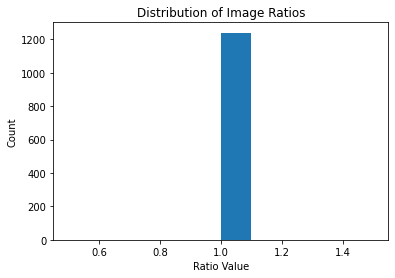

In [4]:


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
img_rows=x_train[0].shape[0]
img_cols=x_train[1].shape[0]
input_shape=(img_rows,img_cols,3)
print(input_shape)
print(len(x_train))


y = dict()
y[0] = []
y[1] = []
for set_name in (y_train,y_testing):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))

trace0 = go.Bar(x=['Train Set', 'Test Set'],y=y[0],name='No',marker=dict(color='#33cc33'),opacity=0.7)
trace1 = go.Bar(x=['Train Set','Test Set'],y=y[1],name='Yes',marker=dict(color='#ff3300'),opacity=0.7)
data = [trace0, trace1]
layout = go.Layout(title='Count of classes in each set',xaxis={'title': 'Set'},yaxis={'title': 'Count'})
fig = go.Figure(data, layout)
iplot(fig)



RATIO_LIST = []
for set in (x_train, x_test):
    for img in set:
        RATIO_LIST.append(img.shape[1]/img.shape[0])
        
plt.hist(RATIO_LIST)
plt.title('Distribution of Image Ratios')
plt.xlabel('Ratio Value')
plt.ylabel('Count')
plt.show()

**Define Image generators**

In [ ]:
datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,vertical_flip=True)
val_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,vertical_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d%h$m%s"))
Logger=keras.callbacks.TensorBoard(log_dir=logdir,write_graph=True,histogram_freq=1)

**CNN Architecture**

In [5]:
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# summarize the model
model.summary()

# from keras.regularizers import l2
# model=Sequential()
# model.add(Conv2D(32, (3, 3), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(2,2))


# model.add(Conv2D(64, (3, 3), kernel_regularizer=l2(0.001)))
# model.add(Activation('relu'))


# model.add(Conv2D(160, (3, 3), kernel_regularizer=l2(0.001)))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

# model.add(Conv2D(160, (3, 3), kernel_regularizer=l2(0.001)))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

# # model.add(Conv2D(160, (3, 3), kernel_regularizer=l2(0.00001)))
# # model.add(Activation('relu'))
# # model.add(Dropout(0.2)
# # model.add(Conv2D(32, (3, 3), kernel_regularizer=l2(0.0001)))
# # model.add(Activation('relu'))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
# model.add(Dense(2))
# model.add(Dropout(0.2))
# model.add(Activation("softmax"))
# print(model.summary())



from keras.optimizers import SGD
opt = SGD(lr=0.0001)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
              metrics=["accuracy"])

# optimizer = keras.optimizers.Adam(lr=0.0001)
# model.compile(optimizer=optimizer,
#               loss="sparse_categorical_crossentropy",
#               metrics=["accuracy"])
# sparse_categorical_crossentropy

# Logger=keras.callbacks.TensorBoard(log_dir=logdir,write_graph=True,histogram_freq=1)

# print("Number of weights after calling the model:", len(model.weights)) 


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

**Fit Model**

In [ ]:
epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)


# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=1,
      shuffle=True
      ,
     callbacks=[earlystop, learning_rate_reduction,mc]
     )

# print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(
# history.history['val_loss'][-1], 
# history.history['val_accuracy'][-1]))

# saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_testing, predicted_classes, target_names=target_names))

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



28/28 [==============================] - 19s 665ms/step - loss: 3.1425 - val_loss: 1.1736
Epoch 2/50


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning:

Reduce LR on plateau conditioned on metric `val_accuracy` which is not available. Available metrics are: val_loss,loss,lr

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning:

Can save best model only with val_accuracy available, skipping.



28/28 [==============================] - 18s 659ms/step - loss: 0.9006 - val_loss: 0.9085
Epoch 3/50
28/28 [==============================] - 19s 662ms/step - loss: 0.7734 - val_loss: 0.7567
Epoch 4/50
28/28 [==============================] - 18s 655ms/step - loss: 0.7460 - val_loss: 0.7959
Epoch 5/50
28/28 [==============================] - 18s 655ms/step - loss: 0.7237 - val_loss: 0.7190
Epoch 6/50
28/28 [==============================] - 18s 656ms/step - loss: 0.7139 - val_loss: 0.6877
Epoch 7/50
28/28 [==============================] - 18s 659ms/step - loss: 0.7069 - val_loss: 0.7272
Epoch 8/50
28/28 [==============================] - 18s 658ms/step - loss: 0.6923 - val_loss: 0.7803
Epoch 9/50
28/28 [==============================] - 18s 658ms/step - loss: 0.6894 - val_loss: 0.7616


TypeError: ignored

**Plot the training and validation accuracy**

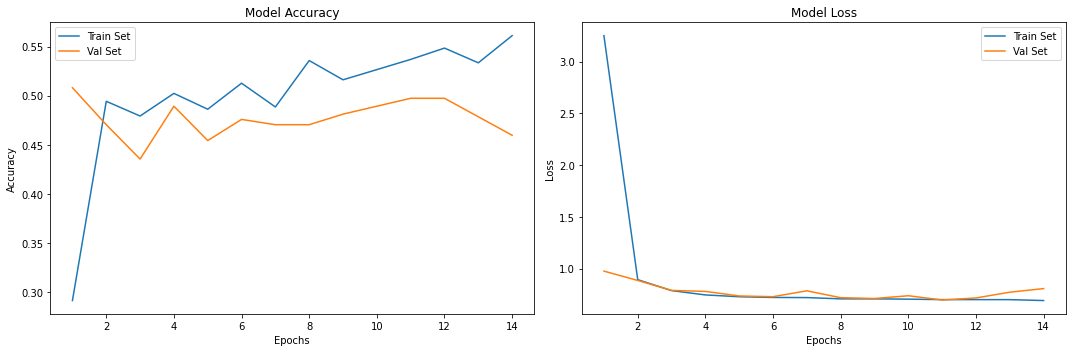

In [ ]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()


# predictions =model.predict_classes(x_test, verbose=1)
# validate on val set

# predictions = [1 if x>0.5 else 0 for x in predictions]
# print(predictions)
# accuracy = accuracy_score(y_testing, predictions)
# print('Val Accuracy = %.2f' % accuracy)

# confusion_mtx = confusion_matrix(y_testing, predictions) 
# cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

**Calculate roc curve and area under curve**

In [ ]:
fpr , tpr , thresholds = roc_curve ( y_testing , y_val_cat_prob)
def plot_roc_curve(fpr,tpr): 
    plt.plot(fpr,tpr) 
    plt.axis([0,1,0,1]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.show()    
plot_roc_curve (fpr,tpr)


auc_score=roc_auc_score(y_testing,y_val_cat_prob)
print(auc_score)

**Confusion Matrix**

In [ ]:
his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_testing, predicted_classes, target_names=target_names))


confusion_mtx = confusion_matrix(y_testing, predicted_classes) 
cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)




**Save** **Model** 

In [ ]:
%tensorboard --port=5036 --logdir $logdir

In [ ]:

model.save('/content/drive/My Drive/Tensorflow/No Aug Path.h5')

In [ ]:
!kill 606

In [5]:
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
tensorflow.random.set_seed(1234)
from skimage import transform as tf

import random




path='/content/drive/My Drive/Balanced Dataset Covid/'
batch_size=32

# Dataset=['brain_tumor_dataset244','brain_tumor_dataset244starry_night','brain_tumor_dataset244the_wave'
# ,'brain_tumor_dataset244udnie','brain_tumor_dataset244candy','brain_tumor_dataset244composition_vii'
# ,'brain_tumor_dataset244feathers','brain_tumor_dataset244la_muse','brain_tumor_dataset244mosaic','brain_tumor_dataset244scream']


# Dataset=['Original224','starry_night224','the_wave224'
# ,'udnie224','candy224','composition_vii224'
# ,'feathers224','la_muse224','mosaic224','the_scream224']

Dataset=['Original224','NSTstarry_night_covid224','NSTthe_wave224'
,'NSTudnie_covid224','NSTcandy_covid224','NSTcomposition_vii_covid224'
,'NSTfeathers_covid224','NSTla_muse_covid224','NSTmosaic_covid224','NSTthe_scream224','SamplepairCT_COVID224']


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

# (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset)

def data_processing(x_train,y_train,x_test,y_testing):
    y_train=y_train.reshape(y_train.shape[0],1)
    y_testing=y_testing.reshape(y_testing.shape[0],1)
    x_train=x_train.astype('float32')
    x_test=x_test.astype('float32')

    x_train/=255
    x_test/=255
    classes = np.unique(y_train)
    nClasses = len(classes)
    num_classes = len(classes)
    img_rows=x_train[0].shape[0]
    img_cols=x_train[1].shape[0]
    input_shape=(img_rows,img_cols,3)
    return x_train,y_train, x_test,y_testing,num_classes

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d%h$m%s"))
Logger=keras.callbacks.TensorBoard(log_dir=logdir,write_graph=True,histogram_freq=1)

from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# summarize the model
model.summary()
optimizer = keras.optimizers.Adam(lr=0.00001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# from keras.optimizers import SGD
# opt = SGD(lr=0.0001)
# model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
#               metrics=["accuracy"])


def train_on_x_samples(batch_size=32, steps=100):
        validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)
        train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)
        history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=steps,
                    epochs=epochs,
                    verbose=0,
                    shuffle=True,
                    callbacks=[earlystop, learning_rate_reduction,mc],
                    validation_data=validation_generator )

        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs_range = range(1, len(history.epoch) + 1)
        plt.figure(figsize=(15,5))

        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, acc, label='Train Set')
        plt.plot(epochs_range, val_acc, label='Val Set')
        plt.legend(loc="best")
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Model Accuracy')

        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, loss, label='Train Set')
        plt.plot(epochs_range, val_loss, label='Val Set')
        plt.legend(loc="best")
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Model Loss')

        plt.tight_layout()
        plt.show()

        return history



def train_acc_results(x_train,y_train):
    _, train_acc = model.evaluate(x_train, y_train, verbose=0)
    print('Train: %.3f' % (train_acc))
    a=train_acc
    return train_acc

def test_acc_results(x_test,y_testing):
    _, test_acc = model.evaluate(x_test,y_testing, verbose=0)
    print('Test: %.3f' % ( test_acc))
    v=test_acc
    return test_acc


mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)


553467904/553467096 [==============================] - 11s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

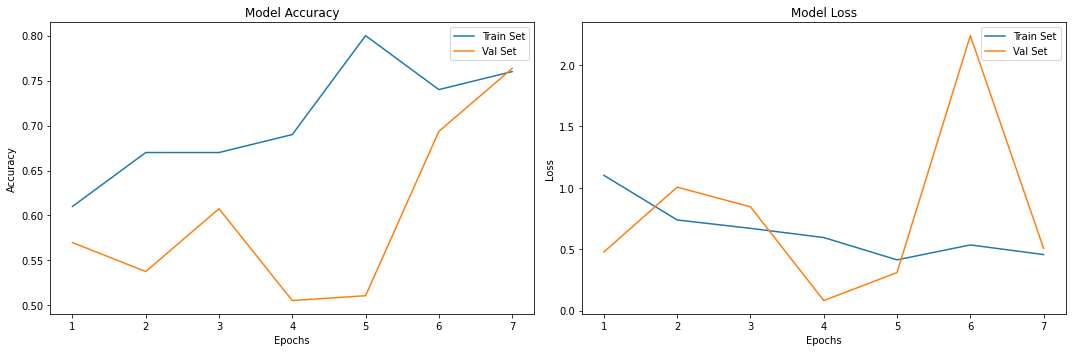

Train: 0.700
Test: 0.586
             Class 0    Class 1  accuracy   macro avg  weighted avg       aug
precision   0.863636   0.548780  0.586022    0.706208      0.706208  Original
recall      0.204301   0.967742  0.586022    0.586022      0.586022  Original
f1-score    0.330435   0.700389  0.586022    0.515412      0.515412  Original
support    93.000000  93.000000  0.586022  186.000000    186.000000  Original


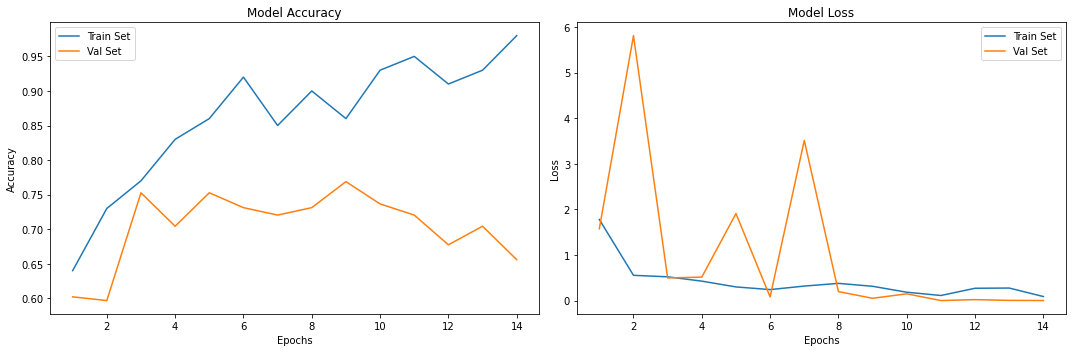

Train: 0.972
Test: 0.688
             Class 0    Class 1  ...  weighted avg             aug
precision   0.710843   0.669903  ...      0.690373  HorizontalFlip
recall      0.634409   0.741935  ...      0.688172  HorizontalFlip
f1-score    0.670455   0.704082  ...      0.687268  HorizontalFlip
support    93.000000  93.000000  ...    186.000000  HorizontalFlip

[4 rows x 6 columns]


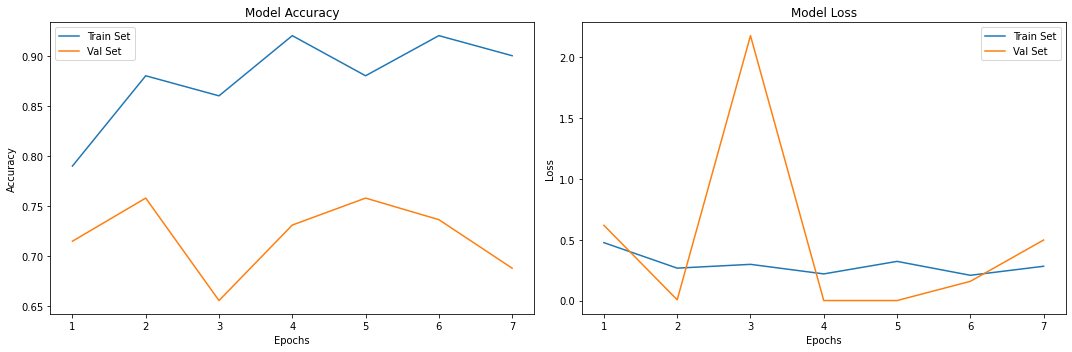

Train: 0.982
Test: 0.742
             Class 0    Class 1  ...  weighted avg          aug
precision   0.758621   0.727273  ...      0.742947  vertialFLip
recall      0.709677   0.774194  ...      0.741935  vertialFLip
f1-score    0.733333   0.750000  ...      0.741667  vertialFLip
support    93.000000  93.000000  ...    186.000000  vertialFLip

[4 rows x 6 columns]


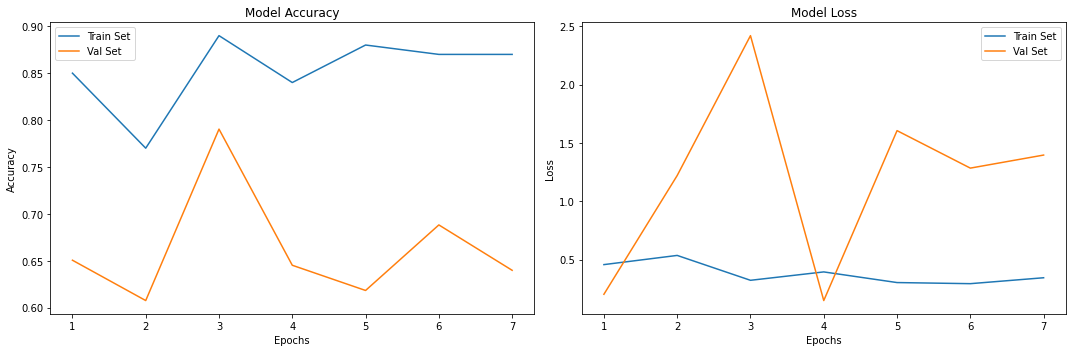

Train: 0.984
Test: 0.753
             Class 0    Class 1  accuracy   macro avg  weighted avg       aug
precision   0.728155   0.783133  0.752688    0.755644      0.755644  Rotation
recall      0.806452   0.698925  0.752688    0.752688      0.752688  Rotation
f1-score    0.765306   0.738636  0.752688    0.751971      0.751971  Rotation
support    93.000000  93.000000  0.752688  186.000000    186.000000  Rotation


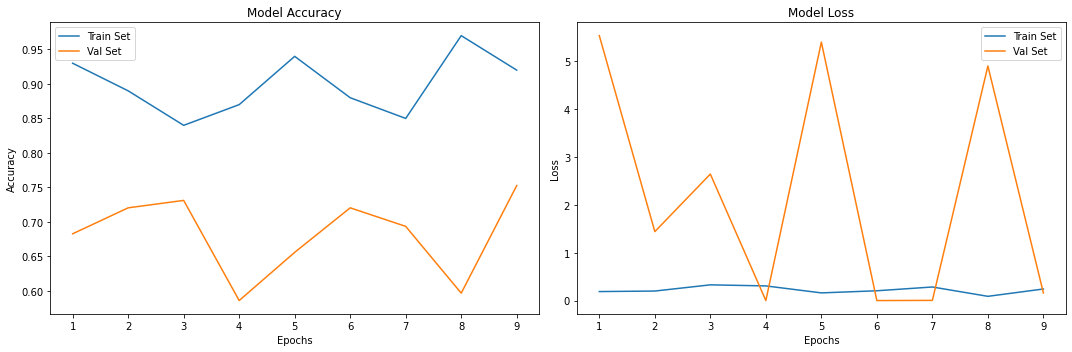

Train: 0.977
Test: 0.790
             Class 0    Class 1  accuracy   macro avg  weighted avg    aug
precision   0.806818   0.775510  0.790323    0.791164      0.791164  shear
recall      0.763441   0.817204  0.790323    0.790323      0.790323  shear
f1-score    0.784530   0.795812  0.790323    0.790171      0.790171  shear
support    93.000000  93.000000  0.790323  186.000000    186.000000  shear


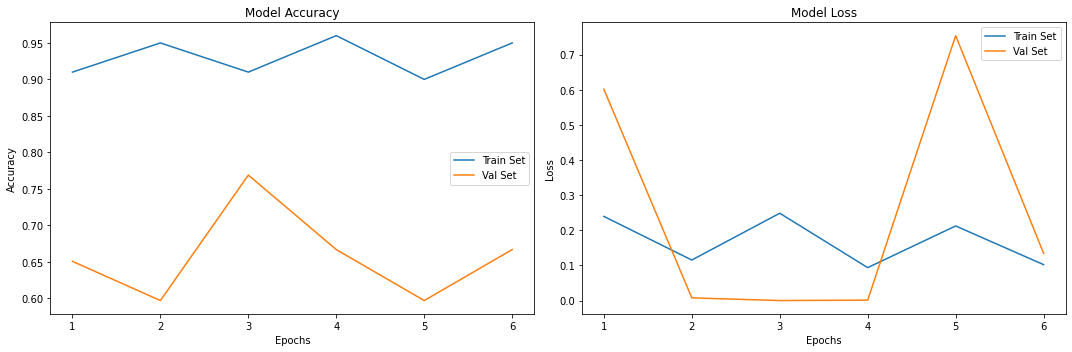

Train: 0.977
Test: 0.747
             Class 0    Class 1  ...  weighted avg                aug
precision   0.767442   0.730000  ...      0.748721  width_shift_range
recall      0.709677   0.784946  ...      0.747312  width_shift_range
f1-score    0.737430   0.756477  ...      0.746953  width_shift_range
support    93.000000  93.000000  ...    186.000000  width_shift_range

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



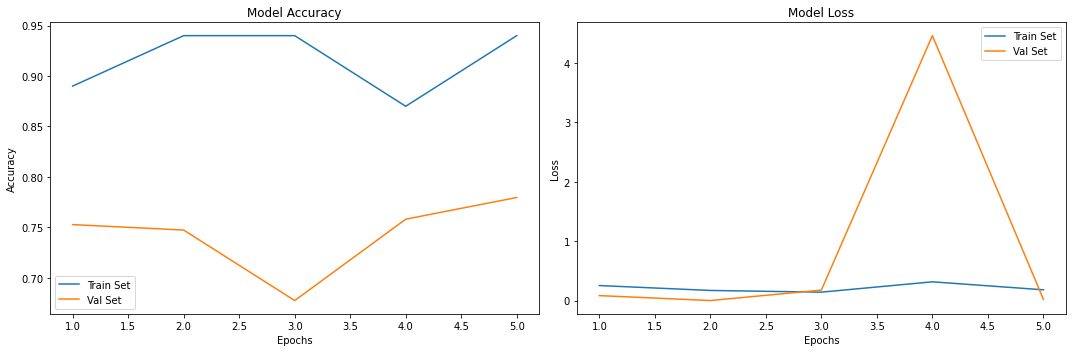

Train: 0.991
Test: 0.780
             Class 0    Class 1  ...  weighted avg                  aug
precision   0.740741   0.833333  ...      0.787037  Horizontal+vertical
recall      0.860215   0.698925  ...      0.779570  Horizontal+vertical
f1-score    0.796020   0.760234  ...      0.778127  Horizontal+vertical
support    93.000000  93.000000  ...    186.000000  Horizontal+vertical

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



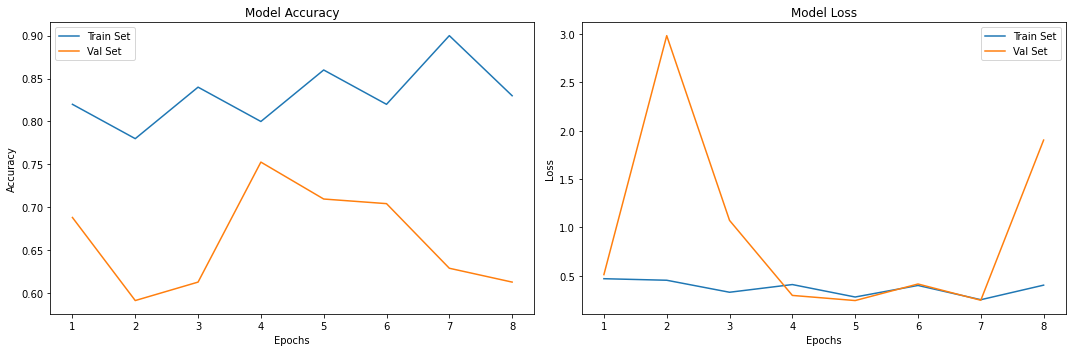

Train: 0.995
Test: 0.699
             Class 0    Class 1  ...  weighted avg                 aug
precision   0.663717   0.753425  ...      0.708571  Horizonta+Rotation
recall      0.806452   0.591398  ...      0.698925  Horizonta+Rotation
f1-score    0.728155   0.662651  ...      0.695403  Horizonta+Rotation
support    93.000000  93.000000  ...    186.000000  Horizonta+Rotation

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



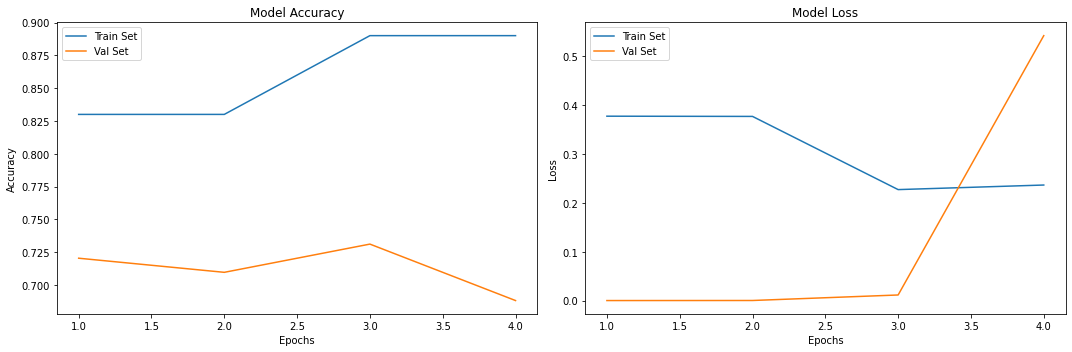

Train: 0.988
Test: 0.704
             Class 0    Class 1  ...  weighted avg              aug
precision   0.693878   0.715909  ...      0.704893  Horizonta+shear
recall      0.731183   0.677419  ...      0.704301  Horizonta+shear
f1-score    0.712042   0.696133  ...      0.704087  Horizonta+shear
support    93.000000  93.000000  ...    186.000000  Horizonta+shear

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



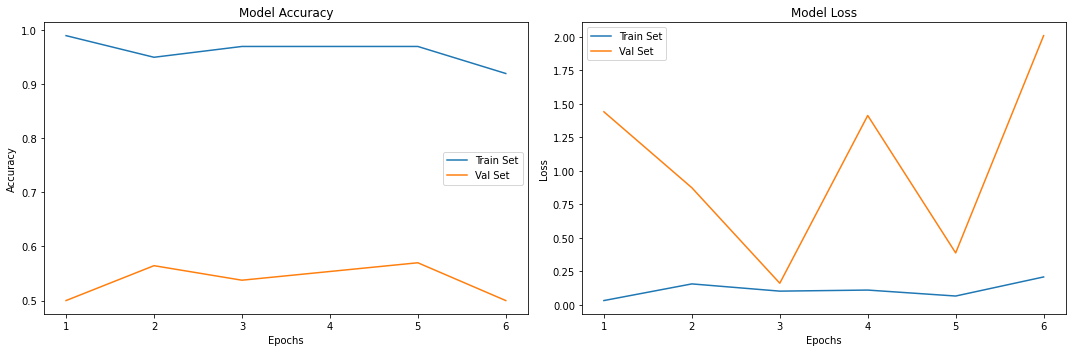

Train: 0.984
Test: 0.747
             Class 0    Class 1  ...  weighted avg                          aug
precision   0.730000   0.767442  ...      0.748721  Horizonta+width_shift_range
recall      0.784946   0.709677  ...      0.747312  Horizonta+width_shift_range
f1-score    0.756477   0.737430  ...      0.746953  Horizonta+width_shift_range
support    93.000000  93.000000  ...    186.000000  Horizonta+width_shift_range

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



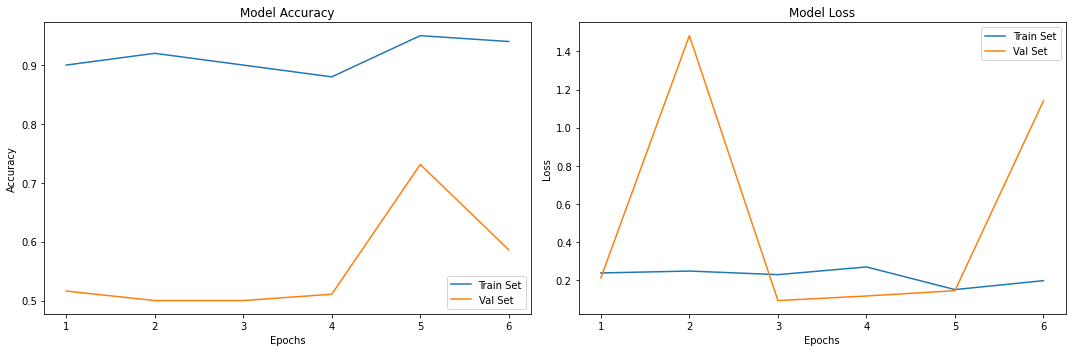

Train: 0.956
Test: 0.753
             Class 0    Class 1  ...  weighted avg                   aug
precision   0.805195   0.715596  ...      0.760396  vertialFLip+Rotation
recall      0.666667   0.838710  ...      0.752688  vertialFLip+Rotation
f1-score    0.729412   0.772277  ...      0.750844  vertialFLip+Rotation
support    93.000000  93.000000  ...    186.000000  vertialFLip+Rotation

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



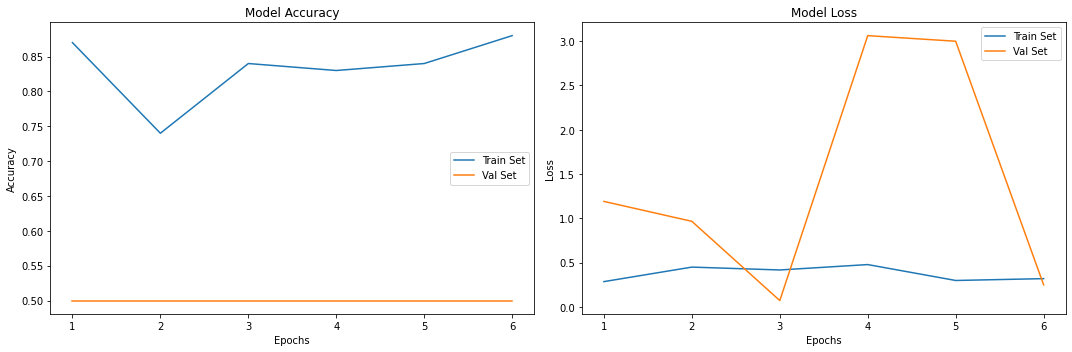

Train: 0.993
Test: 0.742
             Class 0    Class 1  ...  weighted avg                   aug
precision   0.731959   0.752809  ...      0.742384  vertialFLip+Rotation
recall      0.763441   0.720430  ...      0.741935  vertialFLip+Rotation
f1-score    0.747368   0.736264  ...      0.741816  vertialFLip+Rotation
support    93.000000  93.000000  ...    186.000000  vertialFLip+Rotation

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



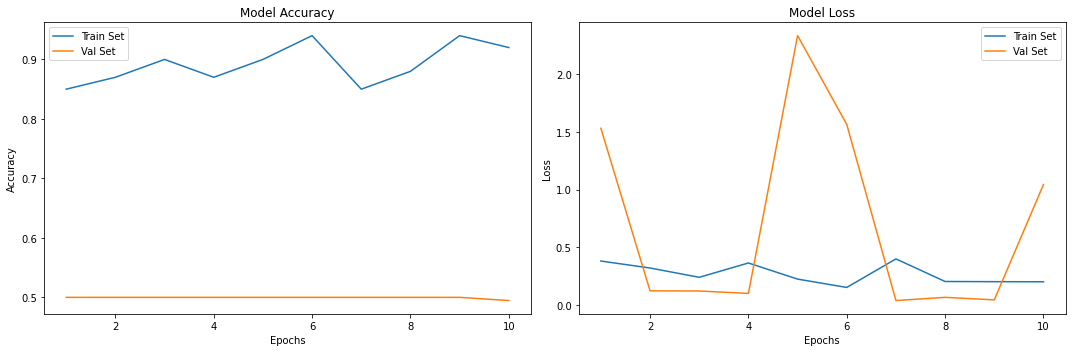

Train: 0.949
Test: 0.694
             Class 0    Class 1  ...  weighted avg                aug
precision   0.709302   0.680000  ...      0.694651  vertialFLip+shear
recall      0.655914   0.731183  ...      0.693548  vertialFLip+shear
f1-score    0.681564   0.704663  ...      0.693114  vertialFLip+shear
support    93.000000  93.000000  ...    186.000000  vertialFLip+shear

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



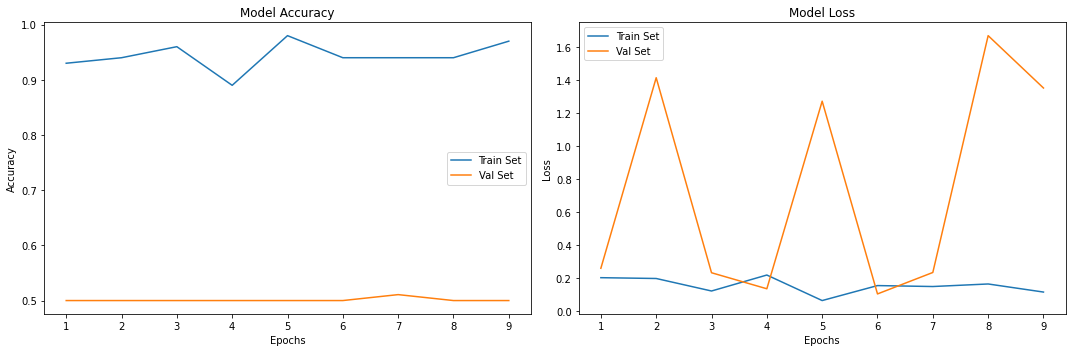

Train: 0.995
Test: 0.790
             Class 0    Class 1  ...  weighted avg                         aug
precision   0.775510   0.806818  ...      0.791164  vertical+width_shift_range
recall      0.817204   0.763441  ...      0.790323  vertical+width_shift_range
f1-score    0.795812   0.784530  ...      0.790171  vertical+width_shift_range
support    93.000000  93.000000  ...    186.000000  vertical+width_shift_range

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



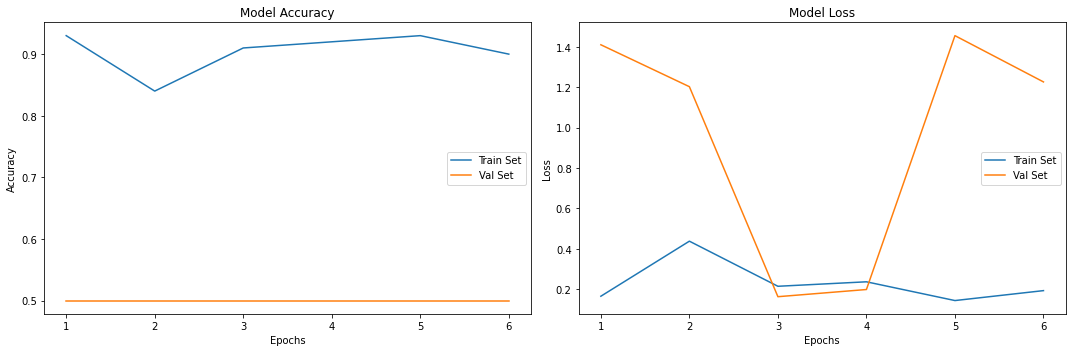

Train: 0.979
Test: 0.758
             Class 0    Class 1  ...  weighted avg                aug
precision   0.792683   0.730769  ...      0.761726  Rotation+vertical
recall      0.698925   0.817204  ...      0.758065  Rotation+vertical
f1-score    0.742857   0.771574  ...      0.757215  Rotation+vertical
support    93.000000  93.000000  ...    186.000000  Rotation+vertical

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



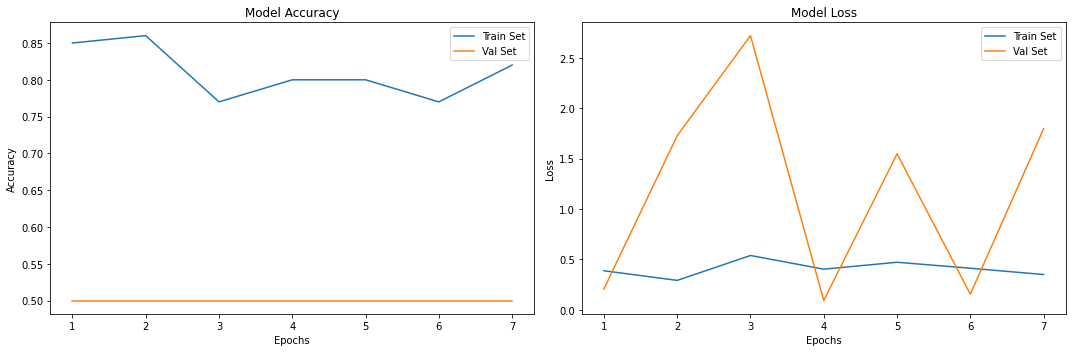

Train: 0.938
Test: 0.651
             Class 0    Class 1  ...  weighted avg                  aug
precision   0.712121   0.616667  ...      0.664394  Horizontal+Rotation
recall      0.505376   0.795699  ...      0.650538  Horizontal+Rotation
f1-score    0.591195   0.694836  ...      0.643015  Horizontal+Rotation
support    93.000000  93.000000  ...    186.000000  Horizontal+Rotation

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



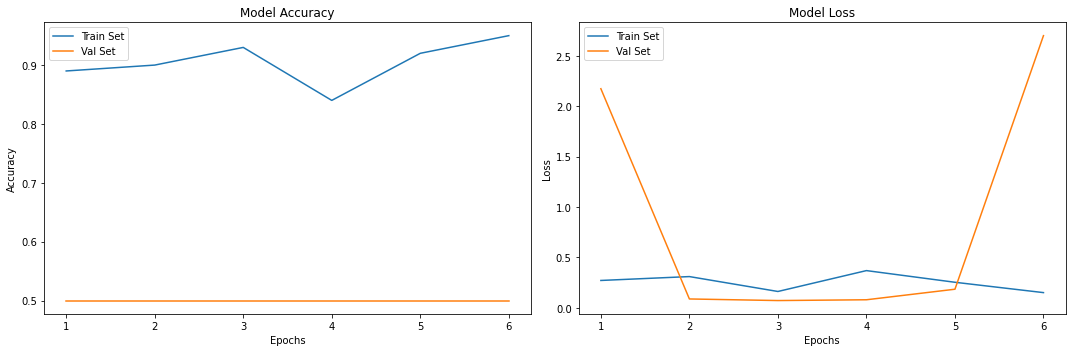

Train: 0.986
Test: 0.758
             Class 0    Class 1  ...  weighted avg             aug
precision   0.815789   0.718182  ...      0.766986  shear+Rotation
recall      0.666667   0.849462  ...      0.758065  shear+Rotation
f1-score    0.733728   0.778325  ...      0.756026  shear+Rotation
support    93.000000  93.000000  ...    186.000000  shear+Rotation

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



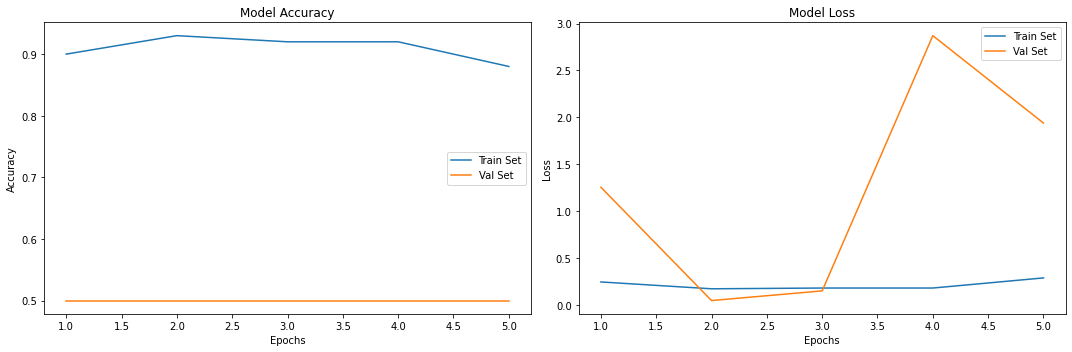

Train: 0.988
Test: 0.747
             Class 0    Class 1  ...  weighted avg                         aug
precision   0.712963   0.794872  ...      0.753917  Rotation+width_shift_range
recall      0.827957   0.666667  ...      0.747312  Rotation+width_shift_range
f1-score    0.766169   0.725146  ...      0.745658  Rotation+width_shift_range
support    93.000000  93.000000  ...    186.000000  Rotation+width_shift_range

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



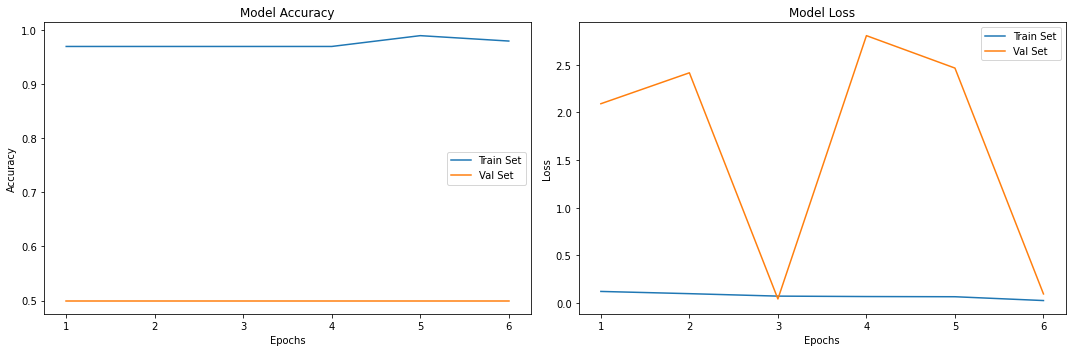

Train: 0.988
Test: 0.731
             Class 0    Class 1  ...  weighted avg             aug
precision   0.811594   0.683761  ...      0.747677  shear+vertical
recall      0.602151   0.860215  ...      0.731183  shear+vertical
f1-score    0.691358   0.761905  ...      0.726631  shear+vertical
support    93.000000  93.000000  ...    186.000000  shear+vertical

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



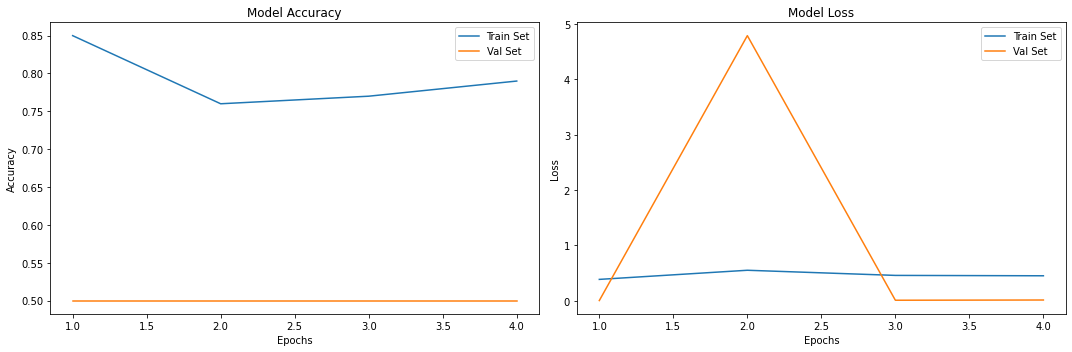

Train: 0.995
Test: 0.801
             Class 0    Class 1  ...  weighted avg               aug
precision   0.791667   0.811111  ...      0.801389  Horizontal+shear
recall      0.817204   0.784946  ...      0.801075  Horizontal+shear
f1-score    0.804233   0.797814  ...      0.801024  Horizontal+shear
support    93.000000  93.000000  ...    186.000000  Horizontal+shear

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



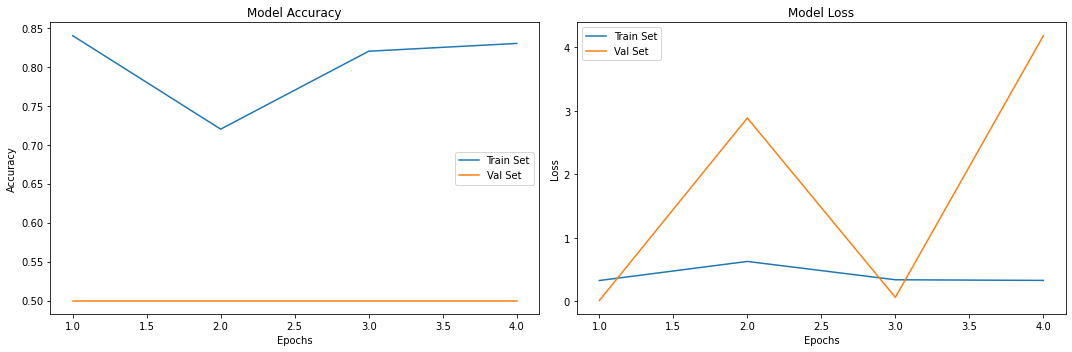

Train: 0.972
Test: 0.640
             Class 0    Class 1  ...  weighted avg             aug
precision   0.608333   0.696970  ...      0.652652  shear+Rotation
recall      0.784946   0.494624  ...      0.639785  shear+Rotation
f1-score    0.685446   0.578616  ...      0.632031  shear+Rotation
support    93.000000  93.000000  ...    186.000000  shear+Rotation

[4 rows x 6 columns]
Ensemble Augmentation for Generic Augmentation


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,acc,val acc
precision,0.863636,0.548780,0.586022,0.706208,0.706208,Original,75.999999,NaN
recall,0.204301,0.967742,0.586022,0.586022,0.586022,Original,75.999999,NaN
f1-score,0.330435,0.700389,0.586022,0.515412,0.515412,Original,75.999999,NaN
support,93.000000,93.000000,0.586022,186.000000,186.000000,Original,75.999999,NaN
precision,0.710843,0.669903,0.688172,0.690373,0.690373,HorizontalFlip,98.000002,65.591395
recall,0.634409,0.741935,0.688172,0.688172,0.688172,HorizontalFlip,98.000002,65.591395
f1-score,0.670455,0.704082,0.688172,0.687268,0.687268,HorizontalFlip,98.000002,65.591395
support,93.000000,93.000000,0.688172,186.000000,186.000000,HorizontalFlip,98.000002,65.591395
precision,0.758621,0.727273,0.741935,0.742947,0.742947,vertialFLip,89.999998,68.817204
recall,0.709677,0.774194,0.741935,0.741935,0.741935,vertialFLip,89.999998,68.817204


In [3]:
epochs=50
i=0
Results=pd.DataFrame([])
num_classes=2
hist_results=[]
Aug=['Original','HorizontalFlip','vertialFLip','Rotation','shear','width_shift_range'
,'Horizontal+vertical','Horizonta+Rotation','Horizonta+shear','Horizonta+width_shift_range'
,'vertialFLip+Rotation','vertialFLip+Rotation','vertialFLip+shear','vertical+width_shift_range'
,'Rotation+vertical','Horizontal+Rotation','shear+Rotation','Rotation+width_shift_range'
,'shear+vertical','Horizontal+shear','shear+Rotation','shear+width_shift_range']


for i in range(len(Aug)):
  if i==0:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)

    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==1:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(horizontal_flip=True)    
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==2:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)    
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==3:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==4:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==5:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==6:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,horizontal_flip=True,vertical_flip=True)
    val_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,horizontal_flip=True,vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==7:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,horizontal_flip=True,rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,horizontal_flip=True,rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1


  elif i==8:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,horizontal_flip=True,shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,horizontal_flip=True,shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==9:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,horizontal_flip=True,width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1



  elif i==10:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,vertical_flip=True,rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1


  elif i==11:
      (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
      data_processing(x_train,y_train,x_test,y_testing)
      datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,vertical_flip=True,shear_range=(random.randrange(0,100,10)))
      val_datagen = ImageDataGenerator(rescale=1./255)
      history = train_on_x_samples(1)
      train_acc_results(x_train,y_train)
      test_acc_results(x_test,y_testing)
      his_df=pd.DataFrame(history.history)
      predicted_classes = model.predict(x_test)
      predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
      target_names = ["Class {}".format(i) for i in range(num_classes)]
      report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
      df=pd.DataFrame(report_dict)
      df['aug']=Aug[i]
      
      print(df)
      df['val acc']=(history.history['val_accuracy'][-1])*100
      df['acc']=(history.history['accuracy'][-1])*100
      Results=Results.append(df)
      i+=1    

  elif i==12:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,vertical_flip=True,width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1




  elif i==13:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=(random.randrange(0,360,30)),vertical_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1


  elif i==14:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=(random.randrange(0,360,30)),horizontal_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==15:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=(random.randrange(0,360,30)),shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==16:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=(random.randrange(0,360,30)),width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1


  elif i==17:
      (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
      data_processing(x_train,y_train,x_test,y_testing)
      datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,shear_range=(random.randrange(0,100,10)),vertical_flip=True)
      val_datagen = ImageDataGenerator(rescale=1./255)
      history = train_on_x_samples(1)
      train_acc_results(x_train,y_train)
      test_acc_results(x_test,y_testing)
      his_df=pd.DataFrame(history.history)
      predicted_classes = model.predict(x_test)
      predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
      target_names = ["Class {}".format(i) for i in range(num_classes)]
      report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
      df=pd.DataFrame(report_dict)
      df['aug']=Aug[i]
      
      print(df)
      df['val acc']=(history.history['val_accuracy'][-1])*100
      df['acc']=(history.history['accuracy'][-1])*100
      Results=Results.append(df)
      i+=1


  elif i==18:
      (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
      data_processing(x_train,y_train,x_test,y_testing)
      datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,shear_range=(random.randrange(0,100,10)),horizontal_flip=True)
      val_datagen = ImageDataGenerator(rescale=1./255)
      history = train_on_x_samples(1)
      train_acc_results(x_train,y_train)
      test_acc_results(x_test,y_testing)
      his_df=pd.DataFrame(history.history)
      predicted_classes = model.predict(x_test)
      predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
      target_names = ["Class {}".format(i) for i in range(num_classes)]
      report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
      df=pd.DataFrame(report_dict)
      df['aug']=Aug[i]
      
      print(df)
      df['val acc']=(history.history['val_accuracy'][-1])*100
      df['acc']=(history.history['accuracy'][-1])*100
      Results=Results.append(df)
      i+=1



  elif i==19:
      (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
      data_processing(x_train,y_train,x_test,y_testing)
      datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,shear_range=(random.randrange(0,100,10)),rotation_range=(random.randrange(0,360,30)))
      val_datagen = ImageDataGenerator(rescale=1./255)
      history = train_on_x_samples(1)
      train_acc_results(x_train,y_train)
      test_acc_results(x_test,y_testing)
      his_df=pd.DataFrame(history.history)
      predicted_classes = model.predict(x_test)
      predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
      target_names = ["Class {}".format(i) for i in range(num_classes)]
      report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
      df=pd.DataFrame(report_dict)
      df['aug']=Aug[i]
      
      print(df)
      df['val acc']=(history.history['val_accuracy'][-1])*100
      df['acc']=(history.history['accuracy'][-1])*100
      Results=Results.append(df)
      i+=1


  elif i==20:
      (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
      data_processing(x_train,y_train,x_test,y_testing)
      datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,shear_range=(random.randrange(0,100,10)),width_shift_range=(random.uniform(0.1,0.9)))
      val_datagen = ImageDataGenerator(rescale=1./255)
      history = train_on_x_samples(1)
      train_acc_results(x_train,y_train)
      test_acc_results(x_test,y_testing)
      his_df=pd.DataFrame(history.history)
      predicted_classes = model.predict(x_test)
      predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
      target_names = ["Class {}".format(i) for i in range(num_classes)]
      report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
      df=pd.DataFrame(report_dict)
      df['aug']=Aug[i]
      
      print(df)
      df['val acc']=(history.history['val_accuracy'][-1])*100
      df['acc']=(history.history['accuracy'][-1])*100
      Results=Results.append(df)
      i+=1



  if i==21:
      break
pd.set_option("display.max_rows", None, "display.max_columns", None)
print('Ensemble Augmentation for Generic Augmentation')
display(Results)


NST ENSEMBLE Augmnetation 
Artistic Style:STARRY NIGHT,THE WAVE,UDNIE

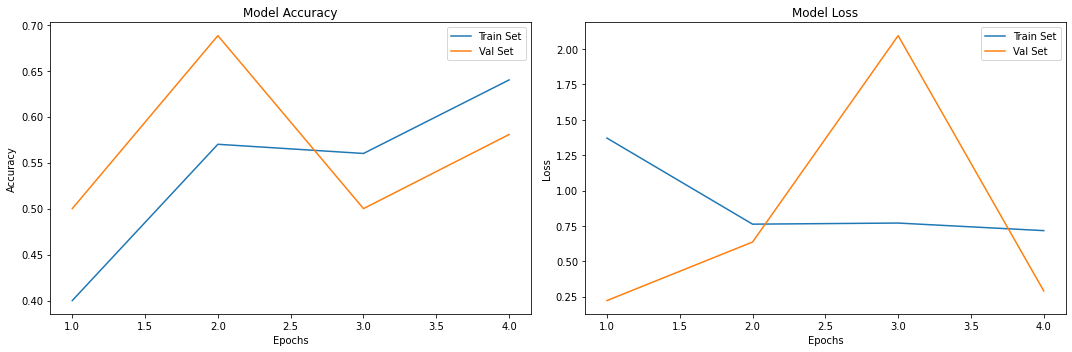

Train: 0.536
Test: 0.516
              Class 0     Class 1  ...  weighted avg           aug
precision    0.714286    0.508380  ...      0.611333  starry_night
recall       0.053763    0.978495  ...      0.516129  starry_night
f1-score     0.100000    0.669118  ...      0.384559  starry_night
support    186.000000  186.000000  ...    372.000000  starry_night

[4 rows x 6 columns]


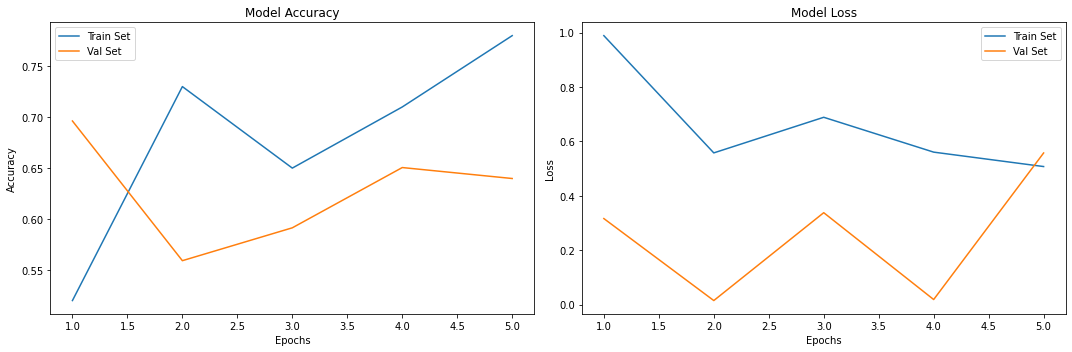

Train: 0.752
Test: 0.634
              Class 0     Class 1  ...  weighted avg                          aug
precision    0.747573    0.594796  ...      0.671184  starry_night_HorizontalFlip
recall       0.413978    0.860215  ...      0.637097  starry_night_HorizontalFlip
f1-score     0.532872    0.703297  ...      0.618084  starry_night_HorizontalFlip
support    186.000000  186.000000  ...    372.000000  starry_night_HorizontalFlip

[4 rows x 6 columns]


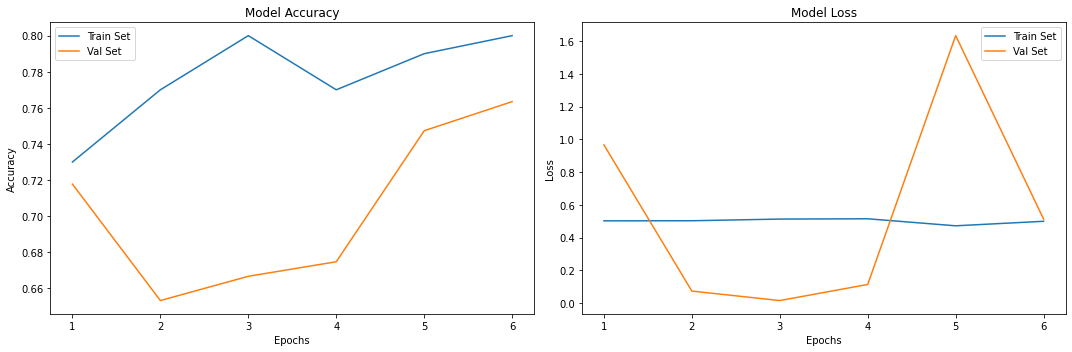

Train: 0.903
Test: 0.790
              Class 0     Class 1  ...  weighted avg                       aug
precision    0.774359    0.802260  ...      0.788309  starry_night_vertialFLip
recall       0.811828    0.763441  ...      0.787634  starry_night_vertialFLip
f1-score     0.792651    0.782369  ...      0.787510  starry_night_vertialFLip
support    186.000000  186.000000  ...    372.000000  starry_night_vertialFLip

[4 rows x 6 columns]


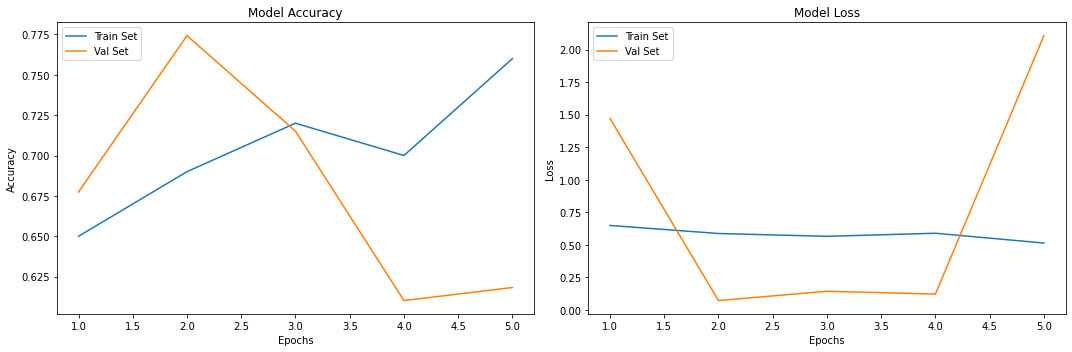

Train: 0.647
Test: 0.618
              Class 0     Class 1  ...  weighted avg                    aug
precision    0.879310    0.570064  ...      0.724687  starry_night_Rotation
recall       0.274194    0.962366  ...      0.618280  starry_night_Rotation
f1-score     0.418033    0.716000  ...      0.567016  starry_night_Rotation
support    186.000000  186.000000  ...    372.000000  starry_night_Rotation

[4 rows x 6 columns]


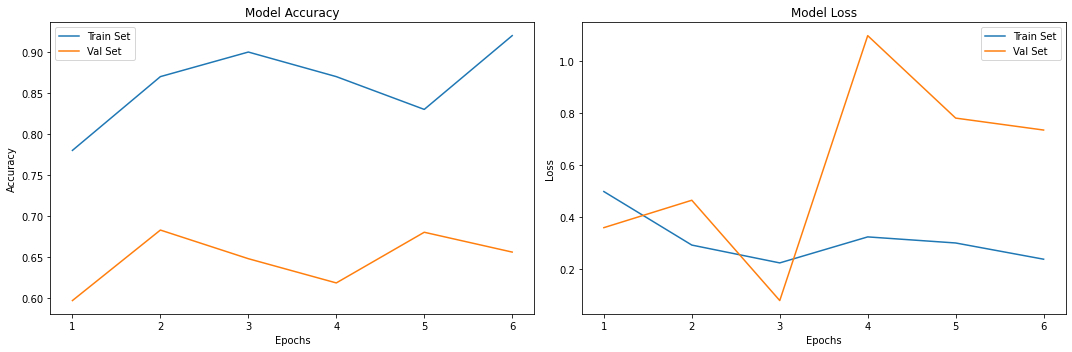

Train: 0.916
Test: 0.758
              Class 0     Class 1  ...  weighted avg                 aug
precision    0.698347    0.869231  ...      0.783789  starry_night_shear
recall       0.908602    0.607527  ...      0.758065  starry_night_shear
f1-score     0.789720    0.715190  ...      0.752455  starry_night_shear
support    186.000000  186.000000  ...    372.000000  starry_night_shear

[4 rows x 6 columns]


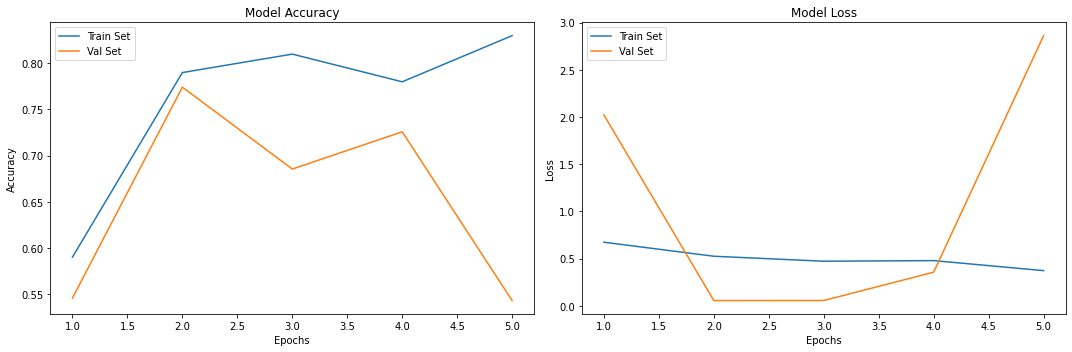

Train: 0.760
Test: 0.626
              Class 0     Class 1  ...  weighted avg                             aug
precision    0.813333    0.579125  ...      0.696229  starry_night_width_shift_range
recall       0.327957    0.924731  ...      0.626344  starry_night_width_shift_range
f1-score     0.467433    0.712215  ...      0.589824  starry_night_width_shift_range
support    186.000000  186.000000  ...    372.000000  starry_night_width_shift_range

[4 rows x 6 columns]


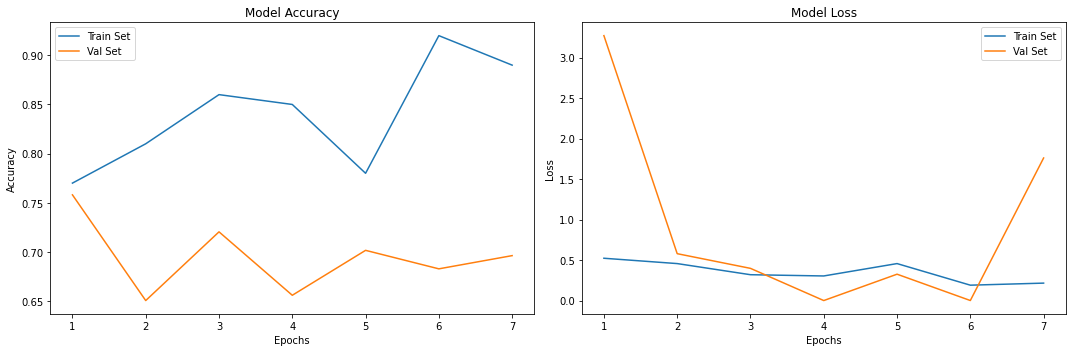

Train: 0.935
Test: 0.707
              Class 0     Class 1  accuracy   macro avg  weighted avg       aug
precision    0.677419    0.748387  0.706989    0.712903      0.712903  the_wave
recall       0.790323    0.623656  0.706989    0.706989      0.706989  the_wave
f1-score     0.729529    0.680352  0.706989    0.704940      0.704940  the_wave
support    186.000000  186.000000  0.706989  372.000000    372.000000  the_wave


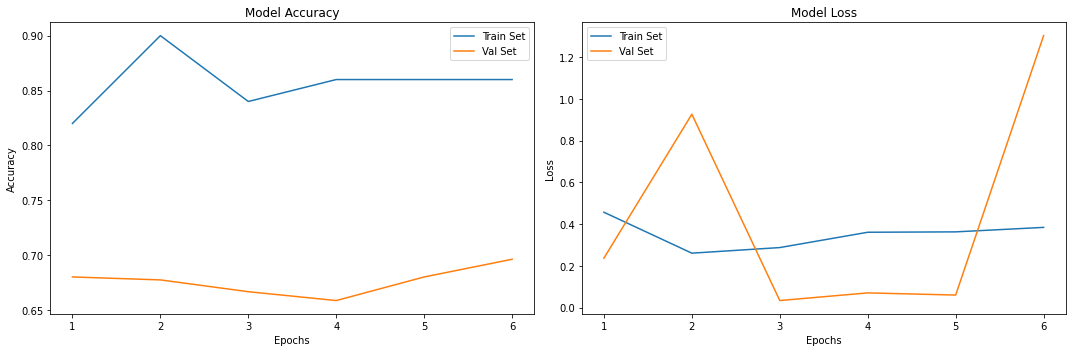

Train: 0.963
Test: 0.704
              Class 0     Class 1  ...  weighted avg                      aug
precision    0.655738    0.796875  ...      0.726306  the_wave_HorizontalFlip
recall       0.860215    0.548387  ...      0.704301  the_wave_HorizontalFlip
f1-score     0.744186    0.649682  ...      0.696934  the_wave_HorizontalFlip
support    186.000000  186.000000  ...    372.000000  the_wave_HorizontalFlip

[4 rows x 6 columns]


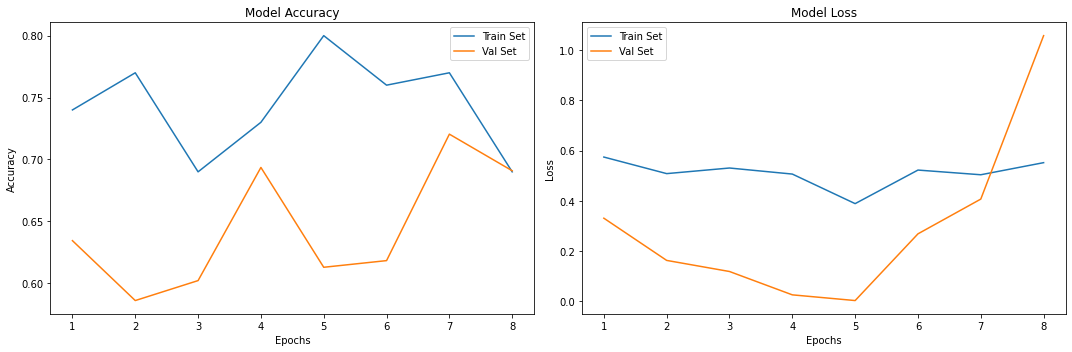

Train: 0.950
Test: 0.720
              Class 0     Class 1  ...  weighted avg                   aug
precision    0.709184    0.732955  ...      0.721069  the_wave_vertialFLip
recall       0.747312    0.693548  ...      0.720430  the_wave_vertialFLip
f1-score     0.727749    0.712707  ...      0.720228  the_wave_vertialFLip
support    186.000000  186.000000  ...    372.000000  the_wave_vertialFLip

[4 rows x 6 columns]


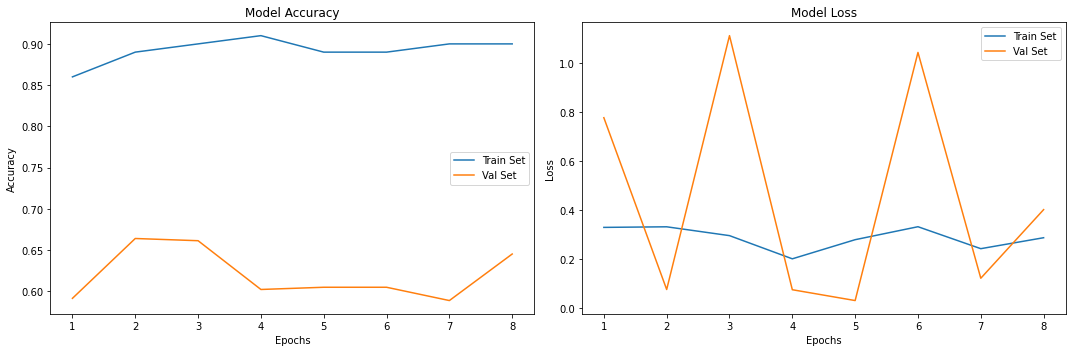

Train: 0.980
Test: 0.710
              Class 0     Class 1  ...  weighted avg                aug
precision    0.691176    0.732143  ...      0.711660  the_wave_Rotation
recall       0.758065    0.661290  ...      0.709677  the_wave_Rotation
f1-score     0.723077    0.694915  ...      0.708996  the_wave_Rotation
support    186.000000  186.000000  ...    372.000000  the_wave_Rotation

[4 rows x 6 columns]


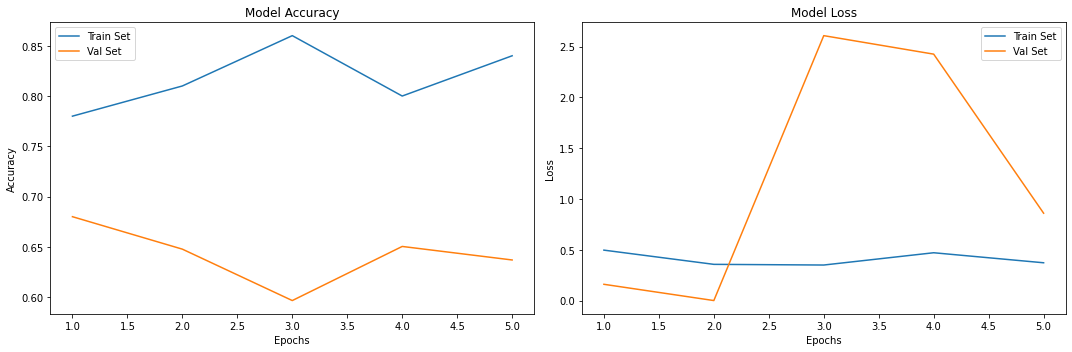

Train: 0.968
Test: 0.672
              Class 0     Class 1  ...  weighted avg             aug
precision    0.650943    0.700000  ...      0.675472  the_wave_shear
recall       0.741935    0.602151  ...      0.672043  the_wave_shear
f1-score     0.693467    0.647399  ...      0.670433  the_wave_shear
support    186.000000  186.000000  ...    372.000000  the_wave_shear

[4 rows x 6 columns]


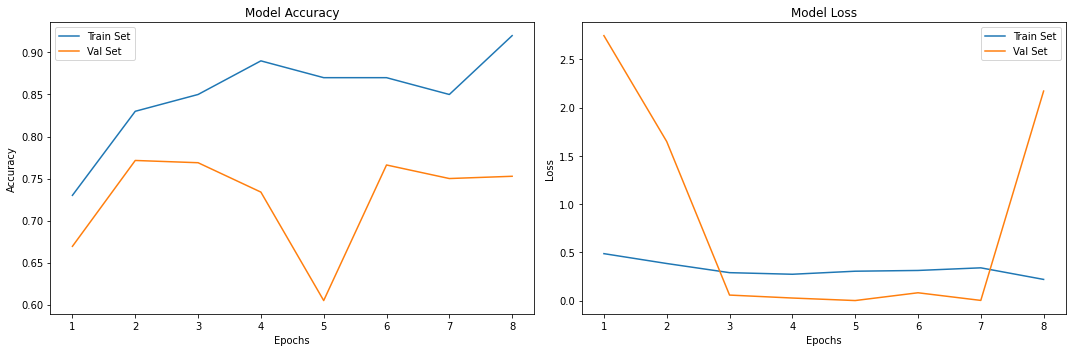

Train: 0.962
Test: 0.715
              Class 0     Class 1  ...  weighted avg                         aug
precision    0.712766    0.717391  ...      0.715079  the_wave_width_shift_range
recall       0.720430    0.709677  ...      0.715054  the_wave_width_shift_range
f1-score     0.716578    0.713514  ...      0.715046  the_wave_width_shift_range
support    186.000000  186.000000  ...    372.000000  the_wave_width_shift_range

[4 rows x 6 columns]


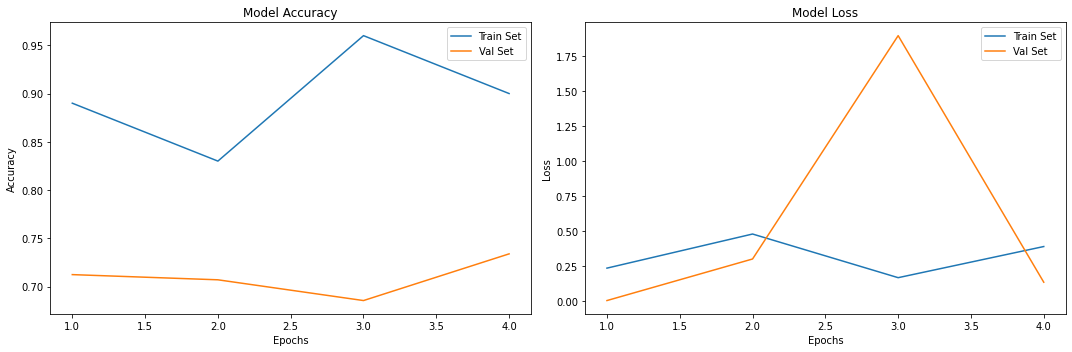

Train: 0.955
Test: 0.742
              Class 0     Class 1  accuracy   macro avg  weighted avg    aug
precision    0.767857    0.720588  0.741935    0.744223      0.744223  udnie
recall       0.693548    0.790323  0.741935    0.741935      0.741935  udnie
f1-score     0.728814    0.753846  0.741935    0.741330      0.741330  udnie
support    186.000000  186.000000  0.741935  372.000000    372.000000  udnie


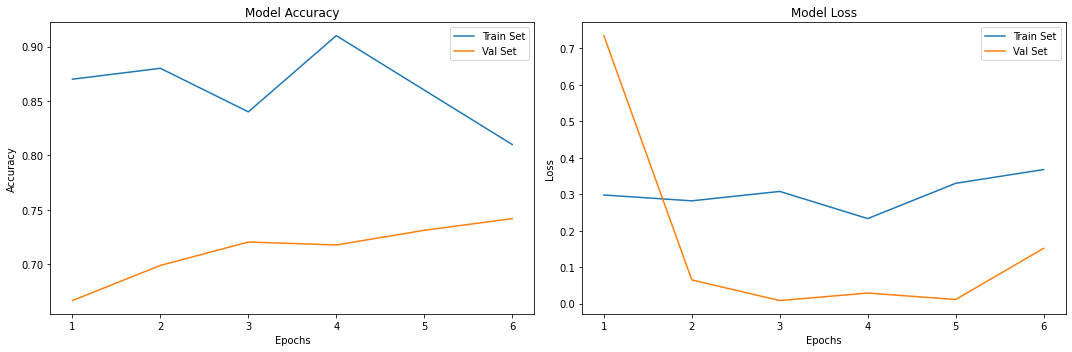

Train: 0.984
Test: 0.745
              Class 0     Class 1  ...  weighted avg                   aug
precision    0.721951    0.772455  ...      0.747203  udnie_HorizontalFlip
recall       0.795699    0.693548  ...      0.744624  udnie_HorizontalFlip
f1-score     0.757033    0.730878  ...      0.743956  udnie_HorizontalFlip
support    186.000000  186.000000  ...    372.000000  udnie_HorizontalFlip

[4 rows x 6 columns]


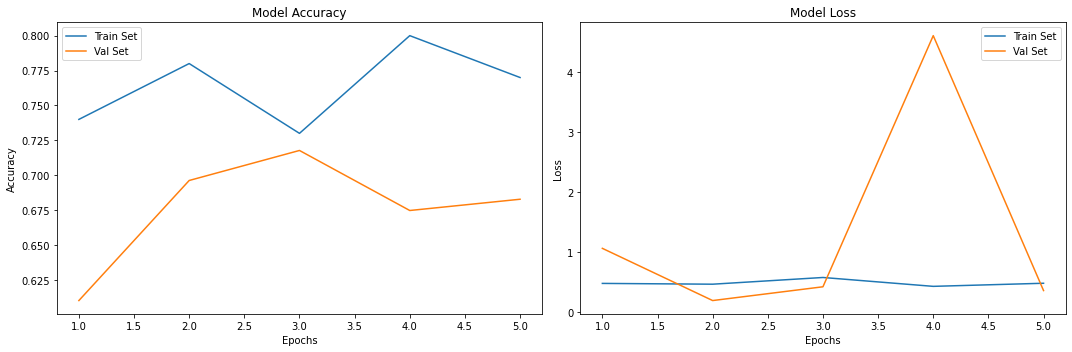

Train: 0.921
Test: 0.739
              Class 0     Class 1  ...  weighted avg                aug
precision    0.815603    0.692641  ...      0.754122  udnie_vertialFLip
recall       0.618280    0.860215  ...      0.739247  udnie_vertialFLip
f1-score     0.703364    0.767386  ...      0.735375  udnie_vertialFLip
support    186.000000  186.000000  ...    372.000000  udnie_vertialFLip

[4 rows x 6 columns]


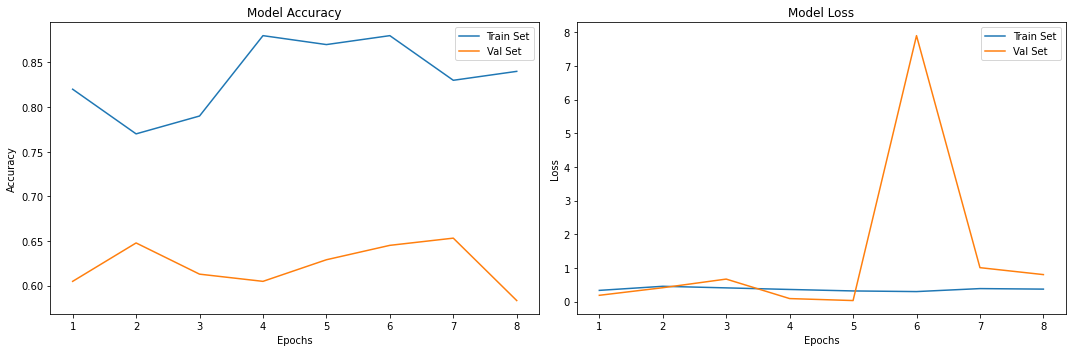

Train: 0.942
Test: 0.710
              Class 0     Class 1  ...  weighted avg             aug
precision    0.666667    0.782609  ...      0.724638  udnie_Rotation
recall       0.838710    0.580645  ...      0.709677  udnie_Rotation
f1-score     0.742857    0.666667  ...      0.704762  udnie_Rotation
support    186.000000  186.000000  ...    372.000000  udnie_Rotation

[4 rows x 6 columns]


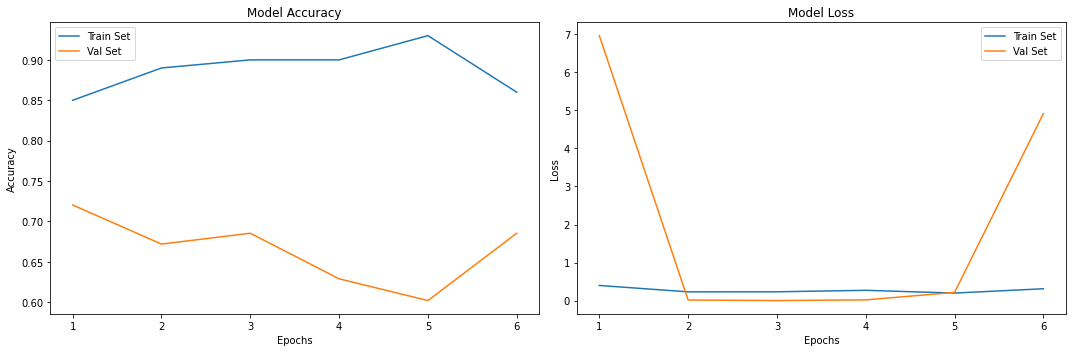

Train: 0.956
Test: 0.702
              Class 0     Class 1  ...  weighted avg          aug
precision    0.707182    0.696335  ...      0.701759  udnie_shear
recall       0.688172    0.715054  ...      0.701613  udnie_shear
f1-score     0.697548    0.705570  ...      0.701559  udnie_shear
support    186.000000  186.000000  ...    372.000000  udnie_shear

[4 rows x 6 columns]


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,val acc,acc
precision,0.714286,0.508380,0.516129,0.611333,0.611333,starry_night,58.064514,63.999999
recall,0.053763,0.978495,0.516129,0.516129,0.516129,starry_night,58.064514,63.999999
f1-score,0.100000,0.669118,0.516129,0.384559,0.384559,starry_night,58.064514,63.999999
support,186.000000,186.000000,0.516129,372.000000,372.000000,starry_night,58.064514,63.999999
precision,0.747573,0.594796,0.637097,0.671184,0.671184,starry_night_HorizontalFlip,63.978493,77.999997
recall,0.413978,0.860215,0.637097,0.637097,0.637097,starry_night_HorizontalFlip,63.978493,77.999997
f1-score,0.532872,0.703297,0.637097,0.618084,0.618084,starry_night_HorizontalFlip,63.978493,77.999997
support,186.000000,186.000000,0.637097,372.000000,372.000000,starry_night_HorizontalFlip,63.978493,77.999997
precision,0.774359,0.802260,0.787634,0.788309,0.788309,starry_night_vertialFLip,76.344085,80.000001
recall,0.811828,0.763441,0.787634,0.787634,0.787634,starry_night_vertialFLip,76.344085,80.000001


In [4]:
epochs=50
i=0
Results=pd.DataFrame([])
hist_results=[]
Aug=['starry_night','starry_night_HorizontalFlip','starry_night_vertialFLip','starry_night_Rotation','starry_night_shear','starry_night_width_shift_range'
,'the_wave','the_wave_HorizontalFlip','the_wave_vertialFLip','the_wave_Rotation','the_wave_shear','the_wave_width_shift_range'
,'udnie','udnie_HorizontalFlip','udnie_vertialFLip','udnie_Rotation','udnie_shear','udnie_width_shift_range']

# classes = np.unique(y_train)
# nClasses = len(classes)


for i in range(len(Aug)):
 
# NST style 1

  if i==0:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[1])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==1:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[1])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen =  ImageDataGenerator(horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==2:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[1])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen =ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==3:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[1])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==4:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[1])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==4:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[1])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen= ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

# NST style 2

  elif i==5:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[2])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==6:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[2])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==7:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[2])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==8:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[2])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==9:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[2])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==10:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[2])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen =ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

# NST style 3

  elif i==11:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[3])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==12:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[3])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen =ImageDataGenerator(horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==13:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[3])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==14:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[3])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==15:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[3])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==16:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[3])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1


    if i==10:
      break
pd.set_option("display.max_rows", None, "display.max_columns", None)
A=Results
display(A)


NST ENSEMBLE Augmnetation 

Artistic Style:CANDY,COMPOSITION,FEATHERS

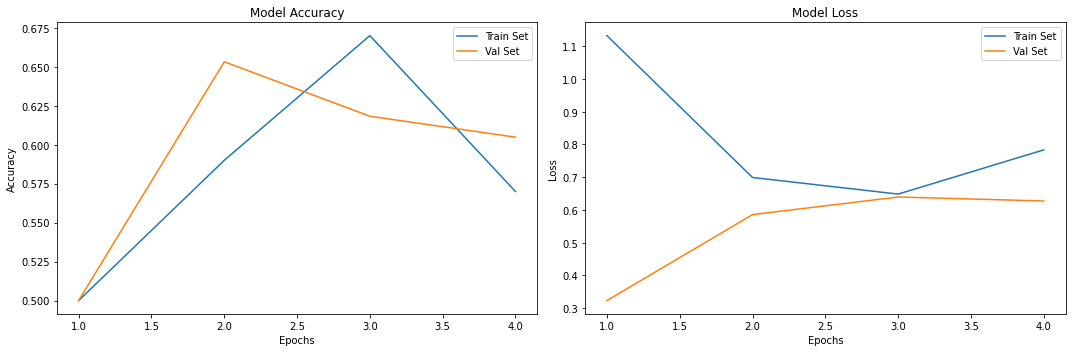

Train: 0.543
Test: 0.527
              Class 0     Class 1  accuracy   macro avg  weighted avg    aug
precision    0.812500    0.514045  0.526882    0.663272      0.663272  candy
recall       0.069892    0.983871  0.526882    0.526882      0.526882  candy
f1-score     0.128713    0.675277  0.526882    0.401995      0.401995  candy
support    186.000000  186.000000  0.526882  372.000000    372.000000  candy


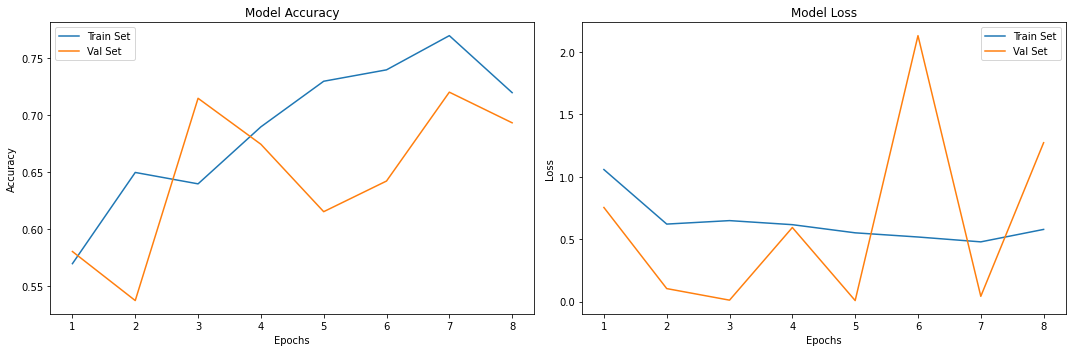

Train: 0.881
Test: 0.702
              Class 0     Class 1  ...  weighted avg                   aug
precision    0.676056    0.735849  ...      0.705953  candy_HorizontalFlip
recall       0.774194    0.629032  ...      0.701613  candy_HorizontalFlip
f1-score     0.721805    0.678261  ...      0.700033  candy_HorizontalFlip
support    186.000000  186.000000  ...    372.000000  candy_HorizontalFlip

[4 rows x 6 columns]


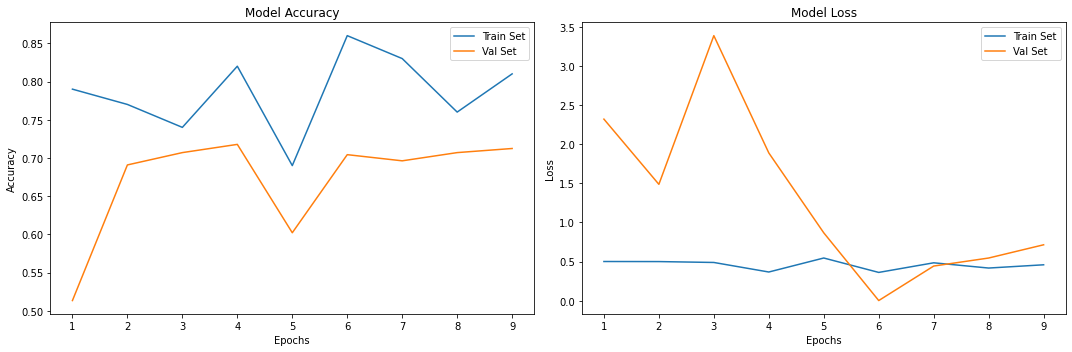

Train: 0.902
Test: 0.715
              Class 0     Class 1  ...  weighted avg                aug
precision    0.704082    0.727273  ...      0.715677  candy_vertialFLip
recall       0.741935    0.688172  ...      0.715054  candy_vertialFLip
f1-score     0.722513    0.707182  ...      0.714848  candy_vertialFLip
support    186.000000  186.000000  ...    372.000000  candy_vertialFLip

[4 rows x 6 columns]


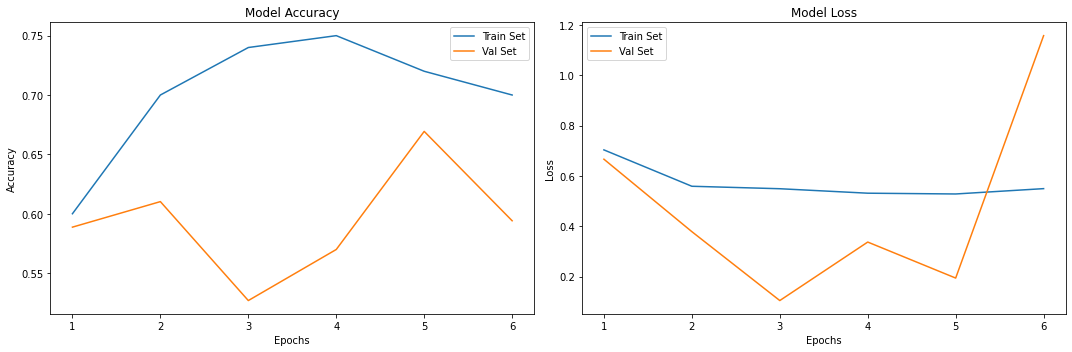

Train: 0.848
Test: 0.651
              Class 0     Class 1  ...  weighted avg             aug
precision    0.600719    0.797872  ...      0.699296  candy_Rotation
recall       0.897849    0.403226  ...      0.650538  candy_Rotation
f1-score     0.719828    0.535714  ...      0.627771  candy_Rotation
support    186.000000  186.000000  ...    372.000000  candy_Rotation

[4 rows x 6 columns]


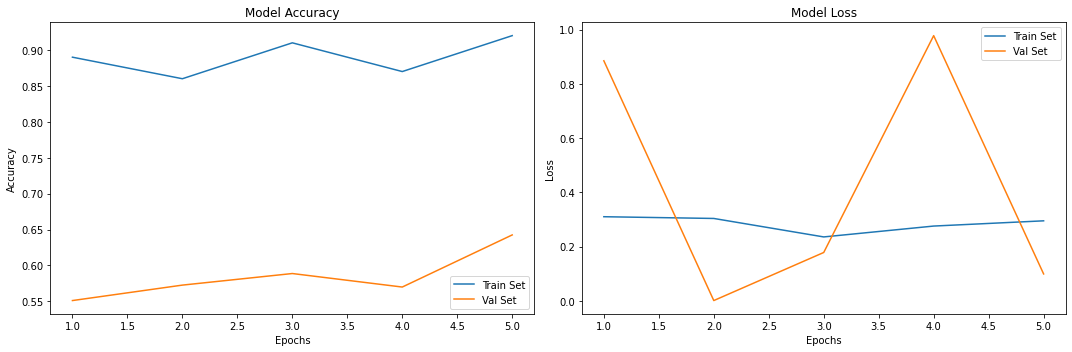

Train: 0.955
Test: 0.761
              Class 0     Class 1  ...  weighted avg          aug
precision    0.717489    0.825503  ...      0.771496  candy_shear
recall       0.860215    0.661290  ...      0.760753  candy_shear
f1-score     0.782396    0.734328  ...      0.758362  candy_shear
support    186.000000  186.000000  ...    372.000000  candy_shear

[4 rows x 6 columns]


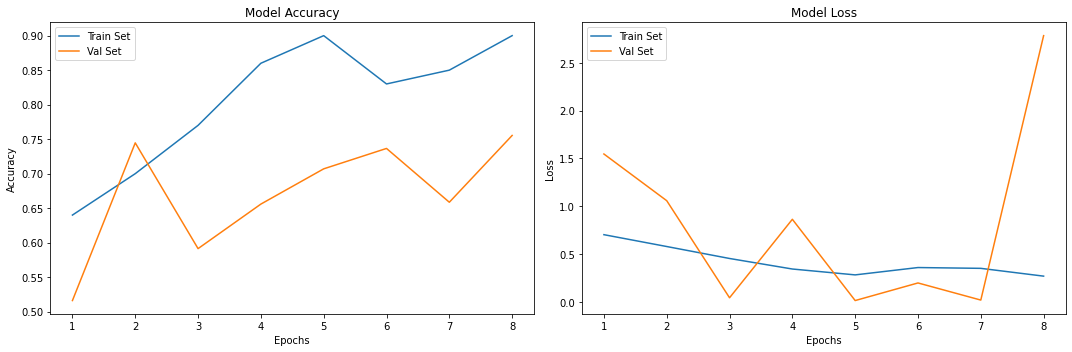

Train: 0.844
Test: 0.702
              Class 0     Class 1  ...  weighted avg                      aug
precision    0.809917    0.649402  ...      0.729660  candy_width_shift_range
recall       0.526882    0.876344  ...      0.701613  candy_width_shift_range
f1-score     0.638436    0.745995  ...      0.692216  candy_width_shift_range
support    186.000000  186.000000  ...    372.000000  candy_width_shift_range

[4 rows x 6 columns]


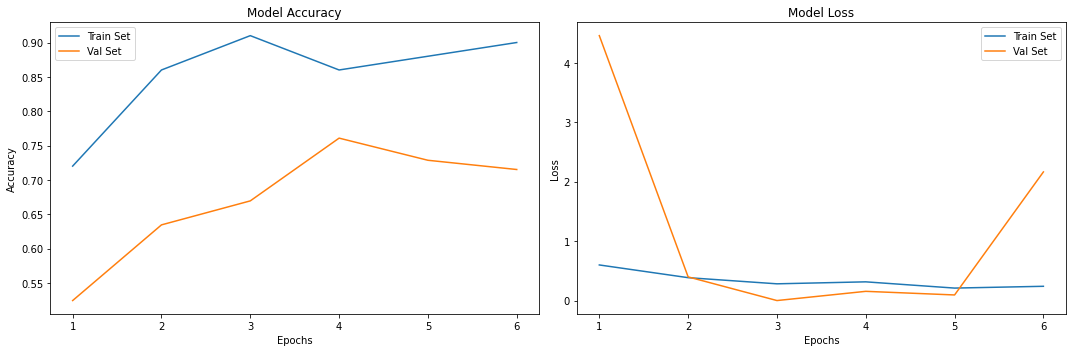

Train: 0.932
Test: 0.710
              Class 0     Class 1  ...  weighted avg              aug
precision    0.661157    0.800000  ...      0.730579  composition_vii
recall       0.860215    0.559140  ...      0.709677  composition_vii
f1-score     0.747664    0.658228  ...      0.702946  composition_vii
support    186.000000  186.000000  ...    372.000000  composition_vii

[4 rows x 6 columns]


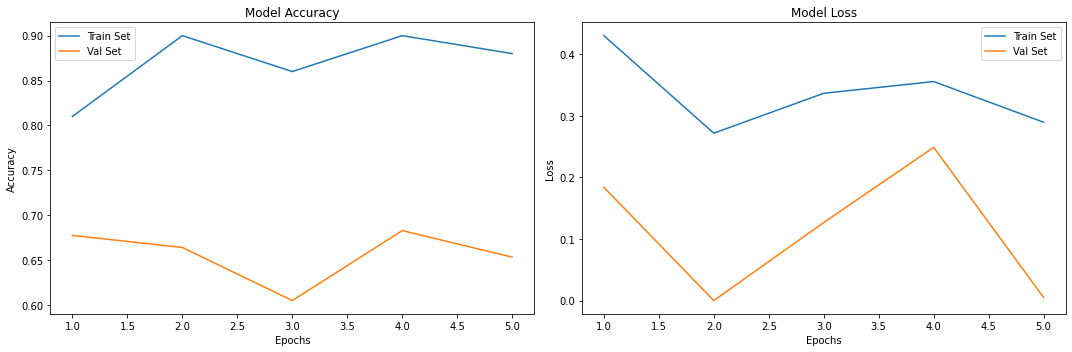

Train: 0.877
Test: 0.653
              Class 0     Class 1  ...  weighted avg                             aug
precision    0.600000    0.827586  ...      0.713793  composition_vii_HorizontalFlip
recall       0.919355    0.387097  ...      0.653226  composition_vii_HorizontalFlip
f1-score     0.726115    0.527473  ...      0.626794  composition_vii_HorizontalFlip
support    186.000000  186.000000  ...    372.000000  composition_vii_HorizontalFlip

[4 rows x 6 columns]


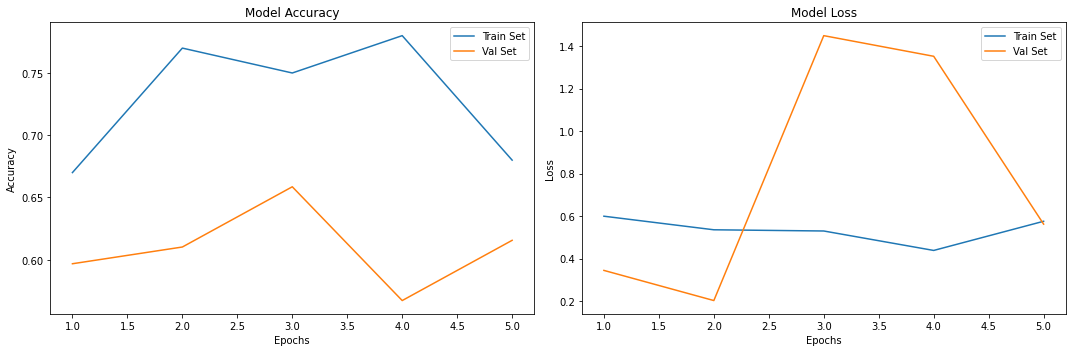

Train: 0.969
Test: 0.661
              Class 0     Class 1  ...  weighted avg                          aug
precision    0.638009    0.701987  ...      0.669998  composition_vii_vertialFLip
recall       0.758065    0.569892  ...      0.663978  composition_vii_vertialFLip
f1-score     0.692875    0.629080  ...      0.660977  composition_vii_vertialFLip
support    186.000000  186.000000  ...    372.000000  composition_vii_vertialFLip

[4 rows x 6 columns]


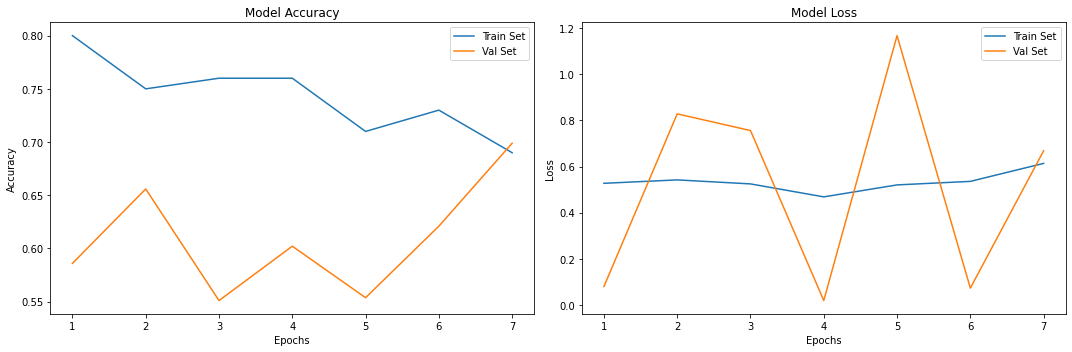

Train: 0.916
Test: 0.734
              Class 0     Class 1  ...  weighted avg                       aug
precision    0.757396    0.714286  ...      0.735841  composition_vii_Rotation
recall       0.688172    0.779570  ...      0.733871  composition_vii_Rotation
f1-score     0.721127    0.745501  ...      0.733314  composition_vii_Rotation
support    186.000000  186.000000  ...    372.000000  composition_vii_Rotation

[4 rows x 6 columns]


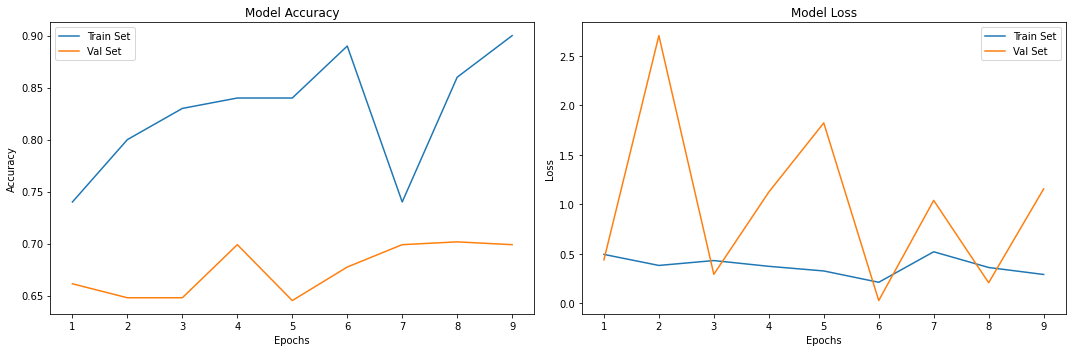

Train: 0.980
Test: 0.707
              Class 0     Class 1  ...  weighted avg                    aug
precision    0.725146    0.691542  ...      0.708344  composition_vii_shear
recall       0.666667    0.747312  ...      0.706989  composition_vii_shear
f1-score     0.694678    0.718346  ...      0.706512  composition_vii_shear
support    186.000000  186.000000  ...    372.000000  composition_vii_shear

[4 rows x 6 columns]


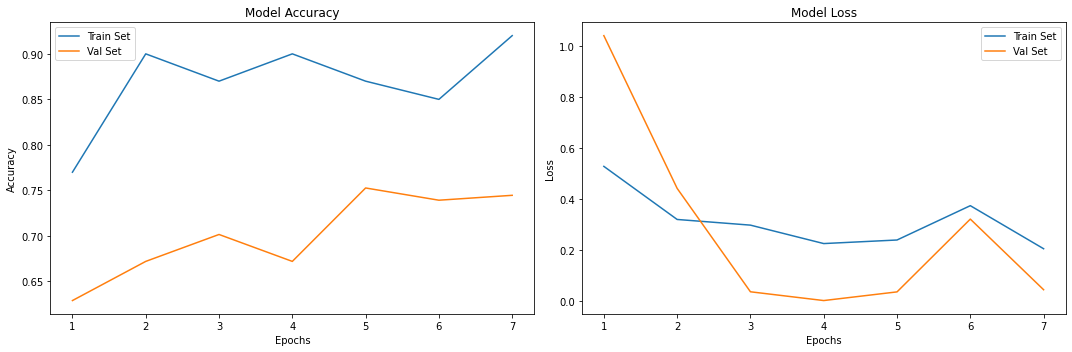

Train: 0.863
Test: 0.723
              Class 0  ...                                aug
precision    0.860870  ...  composition_vii_width_shift_range
recall       0.532258  ...  composition_vii_width_shift_range
f1-score     0.657807  ...  composition_vii_width_shift_range
support    186.000000  ...  composition_vii_width_shift_range

[4 rows x 6 columns]


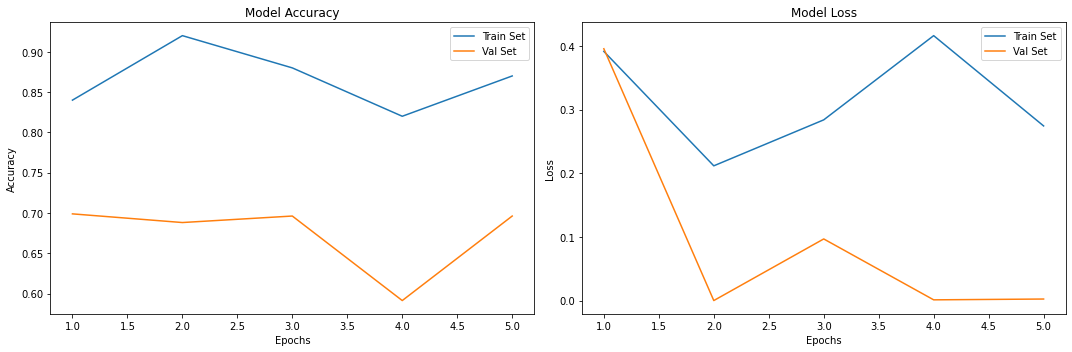

Train: 0.976
Test: 0.715
              Class 0     Class 1  accuracy   macro avg  weighted avg       aug
precision    0.743902    0.692308  0.715054    0.718105      0.718105  feathers
recall       0.655914    0.774194  0.715054    0.715054      0.715054  feathers
f1-score     0.697143    0.730964  0.715054    0.714054      0.714054  feathers
support    186.000000  186.000000  0.715054  372.000000    372.000000  feathers


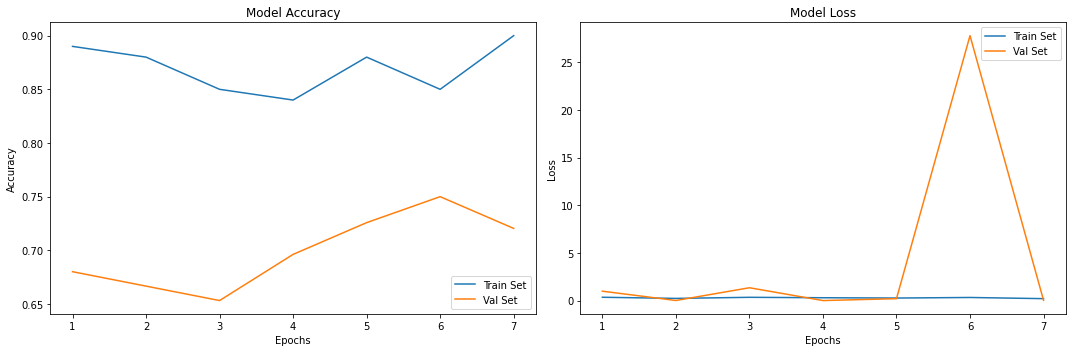

Train: 0.980
Test: 0.742
              Class 0     Class 1  ...  weighted avg                      aug
precision    0.747253    0.736842  ...      0.742047  feathers_HorizontalFlip
recall       0.731183    0.752688  ...      0.741935  feathers_HorizontalFlip
f1-score     0.739130    0.744681  ...      0.741906  feathers_HorizontalFlip
support    186.000000  186.000000  ...    372.000000  feathers_HorizontalFlip

[4 rows x 6 columns]


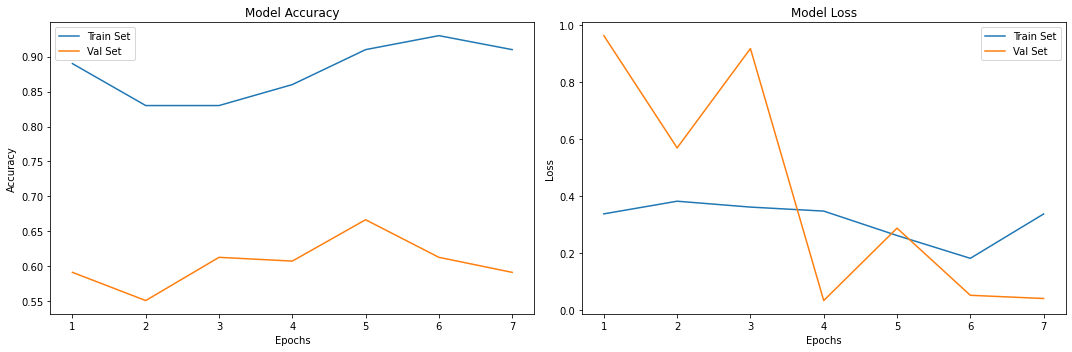

Train: 0.970
Test: 0.734
              Class 0     Class 1  ...  weighted avg                   aug
precision    0.770186    0.706161  ...      0.738174  feathers_vertialFLip
recall       0.666667    0.801075  ...      0.733871  feathers_vertialFLip
f1-score     0.714697    0.750630  ...      0.732664  feathers_vertialFLip
support    186.000000  186.000000  ...    372.000000  feathers_vertialFLip

[4 rows x 6 columns]


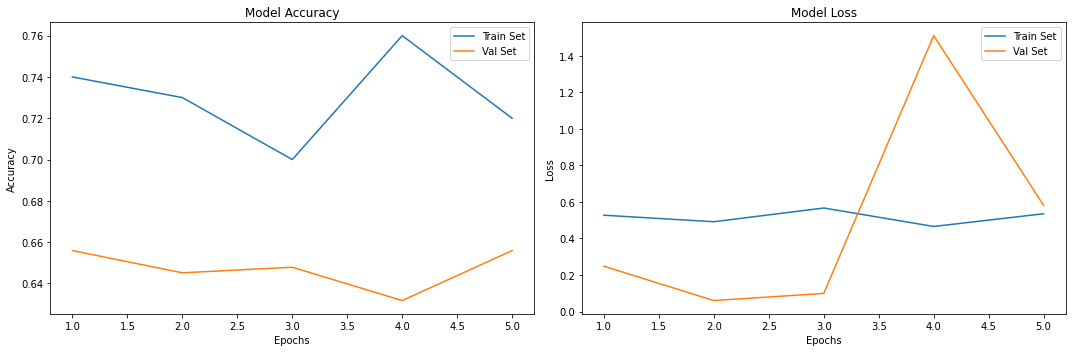

Train: 0.953
Test: 0.680
              Class 0     Class 1  ...  weighted avg                aug
precision    0.628352    0.801802  ...      0.715077  feathers_Rotation
recall       0.881720    0.478495  ...      0.680108  feathers_Rotation
f1-score     0.733781    0.599327  ...      0.666554  feathers_Rotation
support    186.000000  186.000000  ...    372.000000  feathers_Rotation

[4 rows x 6 columns]


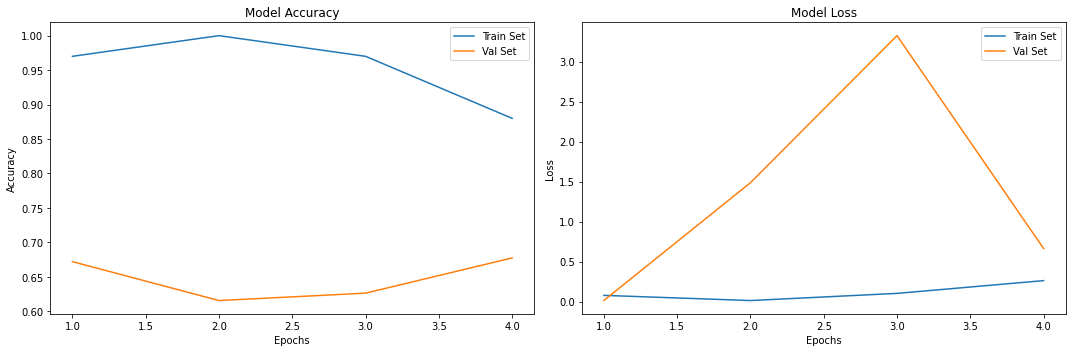

Train: 0.926
Test: 0.785
              Class 0     Class 1  ...  weighted avg             aug
precision    0.839744    0.745370  ...      0.792557  feathers_shear
recall       0.704301    0.865591  ...      0.784946  feathers_shear
f1-score     0.766082    0.800995  ...      0.783538  feathers_shear
support    186.000000  186.000000  ...    372.000000  feathers_shear

[4 rows x 6 columns]


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,val acc,acc
precision,0.812500,0.514045,0.526882,0.663272,0.663272,candy,60.483873,56.999999
recall,0.069892,0.983871,0.526882,0.526882,0.526882,candy,60.483873,56.999999
f1-score,0.128713,0.675277,0.526882,0.401995,0.401995,candy,60.483873,56.999999
support,186.000000,186.000000,0.526882,372.000000,372.000000,candy,60.483873,56.999999
precision,0.676056,0.735849,0.701613,0.705953,0.705953,candy_HorizontalFlip,69.354838,72.000003
recall,0.774194,0.629032,0.701613,0.701613,0.701613,candy_HorizontalFlip,69.354838,72.000003
f1-score,0.721805,0.678261,0.701613,0.700033,0.700033,candy_HorizontalFlip,69.354838,72.000003
support,186.000000,186.000000,0.701613,372.000000,372.000000,candy_HorizontalFlip,69.354838,72.000003
precision,0.704082,0.727273,0.715054,0.715677,0.715677,candy_vertialFLip,71.236557,81.000000
recall,0.741935,0.688172,0.715054,0.715054,0.715054,candy_vertialFLip,71.236557,81.000000


In [6]:
epochs=50
i=0
Results=pd.DataFrame([])
hist_results=[]

Aug=['candy','candy_HorizontalFlip','candy_vertialFLip','candy_Rotation','candy_shear','candy_width_shift_range'
,'composition_vii','composition_vii_HorizontalFlip','composition_vii_vertialFLip','composition_vii_Rotation','composition_vii_shear','composition_vii_width_shift_range'
,'feathers','feathers_HorizontalFlip','feathers_vertialFLip','feathers_Rotation','feathers_shear','feathers_width_shift_range']




for i in range(len(Aug)):
 
# NST style 1

  if i==0:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[4])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==1:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[4])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==2:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[4])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==3:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[4])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==4:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[4])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==4:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[4])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

# NST style 2

  elif i==5:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[5])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==6:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[5])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==7:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[5])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==8:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[5])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen =ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==9:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[5])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==10:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[5])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

# NST style 3

  elif i==11:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[6])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==12:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[6])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==13:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[6])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==14:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[6])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen =  ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==15:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[6])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen =ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==16:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[6])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen =  ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1


    if i==11:
      break
pd.set_option("display.max_rows", None, "display.max_columns", None)

B=Results
display(B)


NST ENSEMBLE Augmnetation 

Artistic Style:LA MUSE,MOSAIC,SCREAM

In [ ]:
epochs=50
i=0
Results=pd.DataFrame([])
hist_results=[]

Aug=['la_muse','la_muse_HorizontalFlip','la_muse_vertialFLip','la_muse_Rotation','la_muse_shear','la_muse_width_shift_range'
,'mosaic','mosaic_HorizontalFlip','mosaic_vertialFLip','mosaic_Rotation','mosaic_shear','mosaic_width_shift_range'
,'scream','scream_HorizontalFlip','scream_vertialFLip','scream_Rotation','scream_shear','scream_width_shift_range']


# classes = np.unique(y_train)
# nClasses = len(classes)
# num_classes = len(classes)

for i in range(len(Aug)):
 
# NST style 1

  if i==0:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[7])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==1:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[7])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==2:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[7])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==3:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[7])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==4:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[7])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==4:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[7])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

# NST style 2

  elif i==5:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[8])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==6:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[8])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==7:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[8])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen =  ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==8:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[8])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==9:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[8])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==10:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[8])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen =  ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

# NST style 3

  elif i==11:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[9])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==12:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[9])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==13:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[9])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==14:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[9])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen =ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==15:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[9])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen =  ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==16:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[9])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1


    if i==11:
      break
pd.set_option("display.max_rows", None, "display.max_columns", None)

C=Results
display(C)

SAMPLE PAIRING ENSEMBLE AUGMENTATION

In [ ]:
epochs=50
i=0
Results=pd.DataFrame([])
hist_results=[]

Aug=['samplepair224','samplepair224_HorizontalFlip','samplepair224_vertialFLip','samplepair224_Rotation','samplepair224_shear','samplepair224_width_shift_range']


# classes = np.unique(y_train)
# nClasses = len(classes)
# num_classes = len(classes)

for i in range(len(Aug)):
 
# NST style 1

  if i==0:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[10])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==1:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[10])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==2:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[10])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==3:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[10])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen =  ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==4:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[10])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen =  ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==4:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[10])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

    if i==5:
      break
pd.set_option("display.max_rows", None, "display.max_columns", None)

D=Results
display(D)
